# EDA(Exploratory Data Analysis)
#### 목적
- #### 변수 간 트렌드, 패턴, 관계 등을 찾기
- #### 데이터 분석 프로젝트 초기에 가설을 수립하기 위해 사용
- #### 데이터 분석 프로젝트 초기에 적절한 모델 및 기법의 선정

![](./6.jpg)

# Describe the Data

# 1) Patient data
- ####  data : 날짜 (2020-01-20 ~ 2020-04-30)
- #### confirmed_date : 코로나19 확진날짜
- #### region : 확진 받은 장소
- #### patient_id : 환자 고유번호
- #### global_num : 국제 감염자수
- #### sex : 성별
- #### birth_year : 츨생년도
- #### country : 국적
- #### disease : 질별 유무
- #### infection_case : 감염경로
- #### infection_order : 감염 순서
- #### infected_by : 감염경로
- #### contact_number : 접촉 횟수
- #### symptom_onset_date : 증상발병 날짜
- #### released_date : 격리해제 날짜
- #### deceased_date : 사망 날짜
- #### state : 상태 (released, isolated, deceased)

# 2) Climate data (from 기상청, 한국환경공단)
- #### data : 날짜 (2020-01-20 ~ 2020-04-30)
- #### sunshine_hr : 가조시간.hr
- #### total_suntime_hr : 합계.일조시간.hr
- #### sun_time_hhmi : 시간.최다일사.시각.hhmi
- #### sun_amount_MJ_m2 : 시간.최다일사량.MJ.m2
- #### total_sun_amount_MJ_m2 : 합계.일사량.MJ.m2
- #### ave_tem : 평균기온.C
- #### mini_tem : 최저기온.C
- #### mini_tem_hhmi : 최저기온.시각.hhmi
- #### max_tem : 최고기온.C.
- #### max_tem_hhmi : 최고기온.시각.hhmi.
- #### day_prec_mm : 일강수량.mm.
- #### max_wind_speed_m.s : 최대.순간.풍속.m.s.
- #### max_wind_speed_hhmi : 최대.순간풍속.시각.hhmi.
- #### ave_wind_speed_m.s : 평균.풍속.m.s.
- #### max_wind_direction_deg : 최대.순간.풍속.풍향.deg.
- #### SO2max : 아황산가스 (ppm)
- #### COmax : 일산화탄소 (ppm)
- #### O3max : 오존 (ppm)
- #### NO2max : 이산화질소 (ppm)
- #### PM10max : PM10 (㎍/㎥)
- #### PM25max : PM2.5 (㎍/㎥)
- #### latitude : 위도
- #### longitude : 경도

# 3) Population data
- #### Region : 시군구 지역
- #### Age	: 나이
- #### January 	: 2020년 1월
- #### February : 2020년 2월	
- #### March : 2020년 3월 	
- #### April : 2020년 4월

# 4) 통신 모바일 인구동향 통계.xlsx
# 5) Smoke data (from OECD Data)
# 6) Obesity data (from 국가지표체계 K-indicator)

![](./1.jpg)

#  Importing Libraries

In [332]:
import numpy as np
import pandas as pd

import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "notebook_connected"
#plotly.io를 import 한 후 renderers 기본값을 "notebook_connected" 로 설정

import folium 
from folium import plugins

In [ ]:
from IPython.display import Markdown as md
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
layout_font = {'font':dict(size=18,color='#60606e',family='Franklin Gothic')}

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [276]:
# import plotly

# from plotly.graph_objs import Scatter, Layout

# print(plotly.__version__)

# plotly.offline.plot({

#     "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],

#     "layout": Layout(title="hello world")

# })
# plotly 작동 확인

# Loading the Data Set

In [451]:
patient = pd.read_csv("./covid_data.csv")
climate = pd.read_csv("./climate_data.csv")
population = pd.read_csv("./population_data.csv")

# Basic Data Exploration

In [452]:
patient.shape

(3388, 18)

In [453]:
patient.head(5)

date  patient_id  global_num     sex  age  birth_year country  \
0  2020-01-20  1400000001         1.0  female  30s      1985.0   China   
1  2020-01-21  1000000001         2.0    male  50s      1964.0   Korea   
2  2020-01-22  2000000001         3.0    male  50s      1966.0   Korea   
3  2020-01-23  2000000002         4.0    male  50s      1964.0   Korea   
4  2020-01-24  1000000002         5.0    male  30s      1987.0   Korea   

      province           city   infection_case  infection_order  infected_by  \
0      Incheon            etc  overseas inflow              NaN          NaN   
1        Seoul     Gangseo-gu  overseas inflow              1.0          NaN   
2  Gyeonggi-do      Goyang-si  overseas inflow              1.0          NaN   
3  Gyeonggi-do  Pyeongtaek-si  overseas inflow              1.0          NaN   
4        Seoul    Jungnang-gu  overseas inflow              1.0          NaN   

   contact_number symptom_onset_date confirmed_date released_date  \
0             NaN         2020-01-19     2020-01-20    2020-02-06   
1            75.0         2020-01-22     2020-01-23    2020-02-05   
2            16.0                NaN     2020-01-26    2020-02-12   
3            95.0                NaN     2020-01-27    2020-02-09   
4            31.0                NaN     2020-01-30    2020-03-02   

  deceased_date     state  
0           NaN  released  
1           NaN  released  
2           NaN  released  
3           NaN  released  
4           NaN  released

In [454]:
patient.tail(5)

date  patient_id  global_num     sex  age  birth_year country  \
3383  NaN  6016000043         NaN  female  70s      1943.0   Korea   
3384  NaN  2000000675     10758.0    male  40s      1973.0   Korea   
3385  NaN  2000000676     10757.0  female  20s      1998.0   Korea   
3386  NaN  4100000143         NaN    male  30s      1981.0   Korea   
3387  NaN  2000000677         NaN  female  20s      1999.0   Korea   

               province            city        infection_case  \
3383   Gyeongsangbuk-do     Yecheon-gun  contact with patient   
3384        Gyeonggi-do       Goyang-si                   etc   
3385        Gyeonggi-do       Yongin-si       overseas inflow   
3386  Chungcheongnam-do      Cheonan-si       overseas inflow   
3387        Gyeonggi-do  Gwangmyeong-si       overseas inflow   

      infection_order   infected_by  contact_number symptom_onset_date  \
3383              NaN  6.016000e+09             NaN                NaN   
3384              NaN           NaN             NaN                NaN   
3385              NaN           NaN             NaN                NaN   
3386              NaN           NaN             4.0                NaN   
3387              NaN           NaN             NaN                NaN   

     confirmed_date released_date deceased_date     state  
3383     2020-04-27           NaN           NaN  isolated  
3384     2020-04-28           NaN           NaN  isolated  
3385     2020-04-28           NaN           NaN  isolated  
3386     2020-04-28           NaN           NaN  isolated  
3387     2020-04-29           NaN           NaN  isolated

In [281]:
patient['sex'][500] #데이터 프레임이 잘불려왔는지 확인하기 위해서 랜덤하게 sex컬럼에 500번째 값 추출

'female'

In [282]:
# for column in patient:
#     print(column)

In [283]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                102 non-null    object 
 1   patient_id          3388 non-null   int64  
 2   global_num          2276 non-null   float64
 3   sex                 3311 non-null   object 
 4   age                 3304 non-null   object 
 5   birth_year          2927 non-null   float64
 6   country             3388 non-null   object 
 7   province            3388 non-null   object 
 8   city                3309 non-null   object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3388 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

In [456]:
patient.describe().round(2)

patient_id    global_num   birth_year  infection_order   infected_by  \
count  3.388000e+03   2276.000000  2927.000000        31.000000  8.220000e+02   
mean   3.498439e+09   6737.086555  1975.068329         2.387097  2.667213e+09   
std    2.201996e+09   3333.136141    20.275295         1.453213  1.741377e+09   
min    1.000000e+09      1.000000  1916.000000         1.000000  1.000000e+09   
25%    1.300000e+09   4270.000000  1961.000000         1.000000  1.200000e+09   
50%    2.000001e+09   7933.000000  1975.000000         2.000000  2.000000e+09   
75%    6.001001e+09   9516.750000  1993.000000         3.000000  4.100000e+09   
max    7.000000e+09  10758.000000  2020.000000         6.000000  7.000000e+09   

       contact_number  
count      643.000000  
mean        18.129082  
std         73.730420  
min          0.000000  
25%          2.000000  
50%          4.000000  
75%         13.000000  
max       1160.000000

In [289]:
patient.describe(include='object')

date     sex   age country          province          city  \
count          102    3311  3304    3388              3388          3309   
unique         102       2    11      12                17           154   
top     2020-01-24  female   20s   Korea  Gyeongsangbuk-do  Gyeongsan-si   
freq             1    1856   802    3361              1230           632   

              infection_case symptom_onset_date confirmed_date released_date  \
count                   2620                481           3388          1327   
unique                    23                 73             87            76   
top     contact with patient         2020-02-27     2020-03-05    2020-03-20   
freq                     968                 29            145            71   

       deceased_date     state  
count             62      3388  
unique            35         3  
top       2020-03-04  released  
freq               4      1886

In [290]:
numeric_feature = patient.columns[(patient.dtypes==int) | (patient.dtypes== float)]
categorical_feature = patient.columns[patient.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['global_num', 'birth_year', 'infection_order', 'infected_by', 'contact_number']
카테고리형 데이터는 다음과 같습니다. 
 ['date', 'sex', 'age', 'country', 'province', 'city', 'infection_case', 'symptom_onset_date', 'confirmed_date', 'released_date', 'deceased_date', 'state']


In [291]:
numeric_feature = patient.select_dtypes(include=['float64', 'int64'])
numeric_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       3388 non-null   int64  
 1   global_num       2276 non-null   float64
 2   birth_year       2927 non-null   float64
 3   infection_order  31 non-null     float64
 4   infected_by      822 non-null    float64
 5   contact_number   643 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 158.9 KB


In [292]:
categorical_feature = patient.select_dtypes(include=['object'])
categorical_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                102 non-null    object
 1   sex                 3311 non-null   object
 2   age                 3304 non-null   object
 3   country             3388 non-null   object
 4   province            3388 non-null   object
 5   city                3309 non-null   object
 6   infection_case      2620 non-null   object
 7   symptom_onset_date  481 non-null    object
 8   confirmed_date      3388 non-null   object
 9   released_date       1327 non-null   object
 10  deceased_date       62 non-null     object
 11  state               3388 non-null   object
dtypes: object(12)
memory usage: 317.8+ KB


In [293]:
for colname in categorical_feature.columns:
    print (colname)
    print (categorical_feature[colname].value_counts(), '\n')

date
2020-01-24    1
2020-04-25    1
2020-02-28    1
2020-03-17    1
2020-04-30    1
             ..
2020-04-28    1
2020-04-18    1
2020-04-27    1
2020-02-13    1
2020-03-27    1
Name: date, Length: 102, dtype: int64 

sex
female    1856
male      1455
Name: sex, dtype: int64 

age
20s     802
50s     597
40s     455
30s     438
60s     401
70s     204
80s     156
10s     150
0s       55
90s      45
100s      1
Name: age, dtype: int64 

country
Korea            3361
China              11
United States       6
Thailand            2
Switzerland         1
Canada              1
France              1
Mongolia            1
Germany             1
Indonesia           1
Spain               1
Vietnam             1
Name: country, dtype: int64 

province
Gyeongsangbuk-do     1230
Gyeonggi-do           677
Seoul                 633
Chungcheongnam-do     143
Busan                 134
Gyeongsangnam-do      116
Incheon                92
Daegu                  63
Gangwon-do             51
Sejong      

# Checking missing value

In [26]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(patient)

결측치가 있는 컬럼은: global_num입니다
해당 컬럼에 총 1112개의 결측치가 존재합니다.
결측치가 있는 컬럼은: sex입니다
해당 컬럼에 총 77개의 결측치가 존재합니다.
결측치가 있는 컬럼은: birth_year입니다
해당 컬럼에 총 461개의 결측치가 존재합니다.
결측치가 있는 컬럼은: city입니다
해당 컬럼에 총 79개의 결측치가 존재합니다.
결측치가 있는 컬럼은: infection_case입니다
해당 컬럼에 총 768개의 결측치가 존재합니다.
결측치가 있는 컬럼은: infection_order입니다
해당 컬럼에 총 3357개의 결측치가 존재합니다.
결측치가 있는 컬럼은: infected_by입니다
해당 컬럼에 총 2566개의 결측치가 존재합니다.
결측치가 있는 컬럼은: contact_number입니다
해당 컬럼에 총 2745개의 결측치가 존재합니다.
결측치가 있는 컬럼은: symptom_onset_date입니다
해당 컬럼에 총 2907개의 결측치가 존재합니다.
결측치가 있는 컬럼은: released_date입니다
해당 컬럼에 총 2061개의 결측치가 존재합니다.
결측치가 있는 컬럼은: deceased_date입니다
해당 컬럼에 총 3326개의 결측치가 존재합니다.


In [27]:
for col in patient.columns:
    msg = 'column: {:>20}\t NaN 값 퍼센트 : {:.2f}%'.format(col, 100 * (patient[col].isnull().sum() / patient[col].shape[0]))
    print(msg)

column:           patient_id	 NaN 값 퍼센트 : 0.00%
column:           global_num	 NaN 값 퍼센트 : 32.82%
column:                  sex	 NaN 값 퍼센트 : 2.27%
column:           birth_year	 NaN 값 퍼센트 : 13.61%
column:              country	 NaN 값 퍼센트 : 0.00%
column:             province	 NaN 값 퍼센트 : 0.00%
column:                 city	 NaN 값 퍼센트 : 2.33%
column:       infection_case	 NaN 값 퍼센트 : 22.67%
column:      infection_order	 NaN 값 퍼센트 : 99.09%
column:          infected_by	 NaN 값 퍼센트 : 75.74%
column:       contact_number	 NaN 값 퍼센트 : 81.02%
column:   symptom_onset_date	 NaN 값 퍼센트 : 85.80%
column:       confirmed_date	 NaN 값 퍼센트 : 0.00%
column:        released_date	 NaN 값 퍼센트 : 60.83%
column:        deceased_date	 NaN 값 퍼센트 : 98.17%
column:                state	 NaN 값 퍼센트 : 0.00%


<AxesSubplot:>

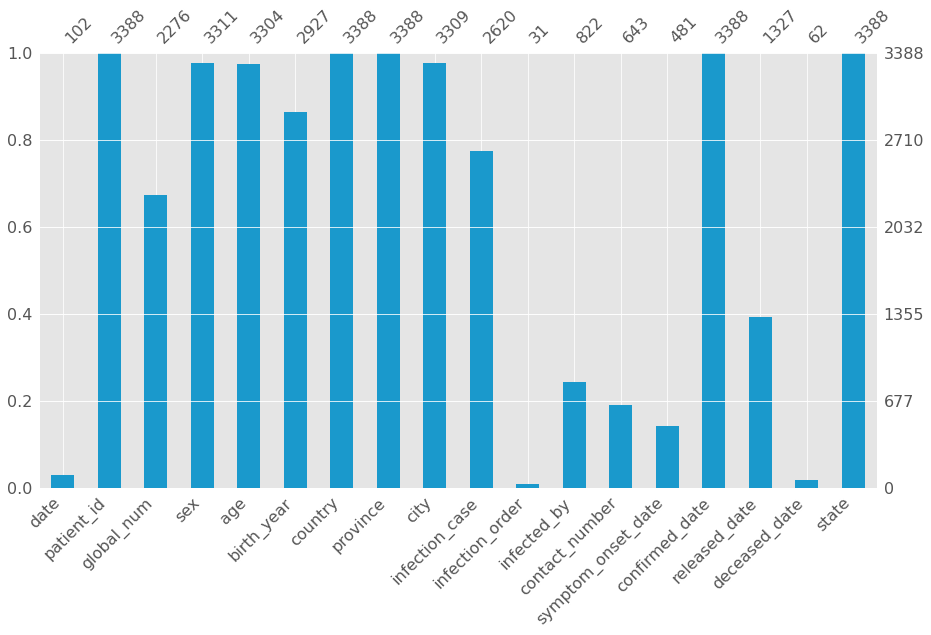

In [328]:
import missingno as msno
msno.bar(df=patient.iloc[:, :], color=(0.1, 0.6, 0.8), figsize =(15,8))

# Data Visualization

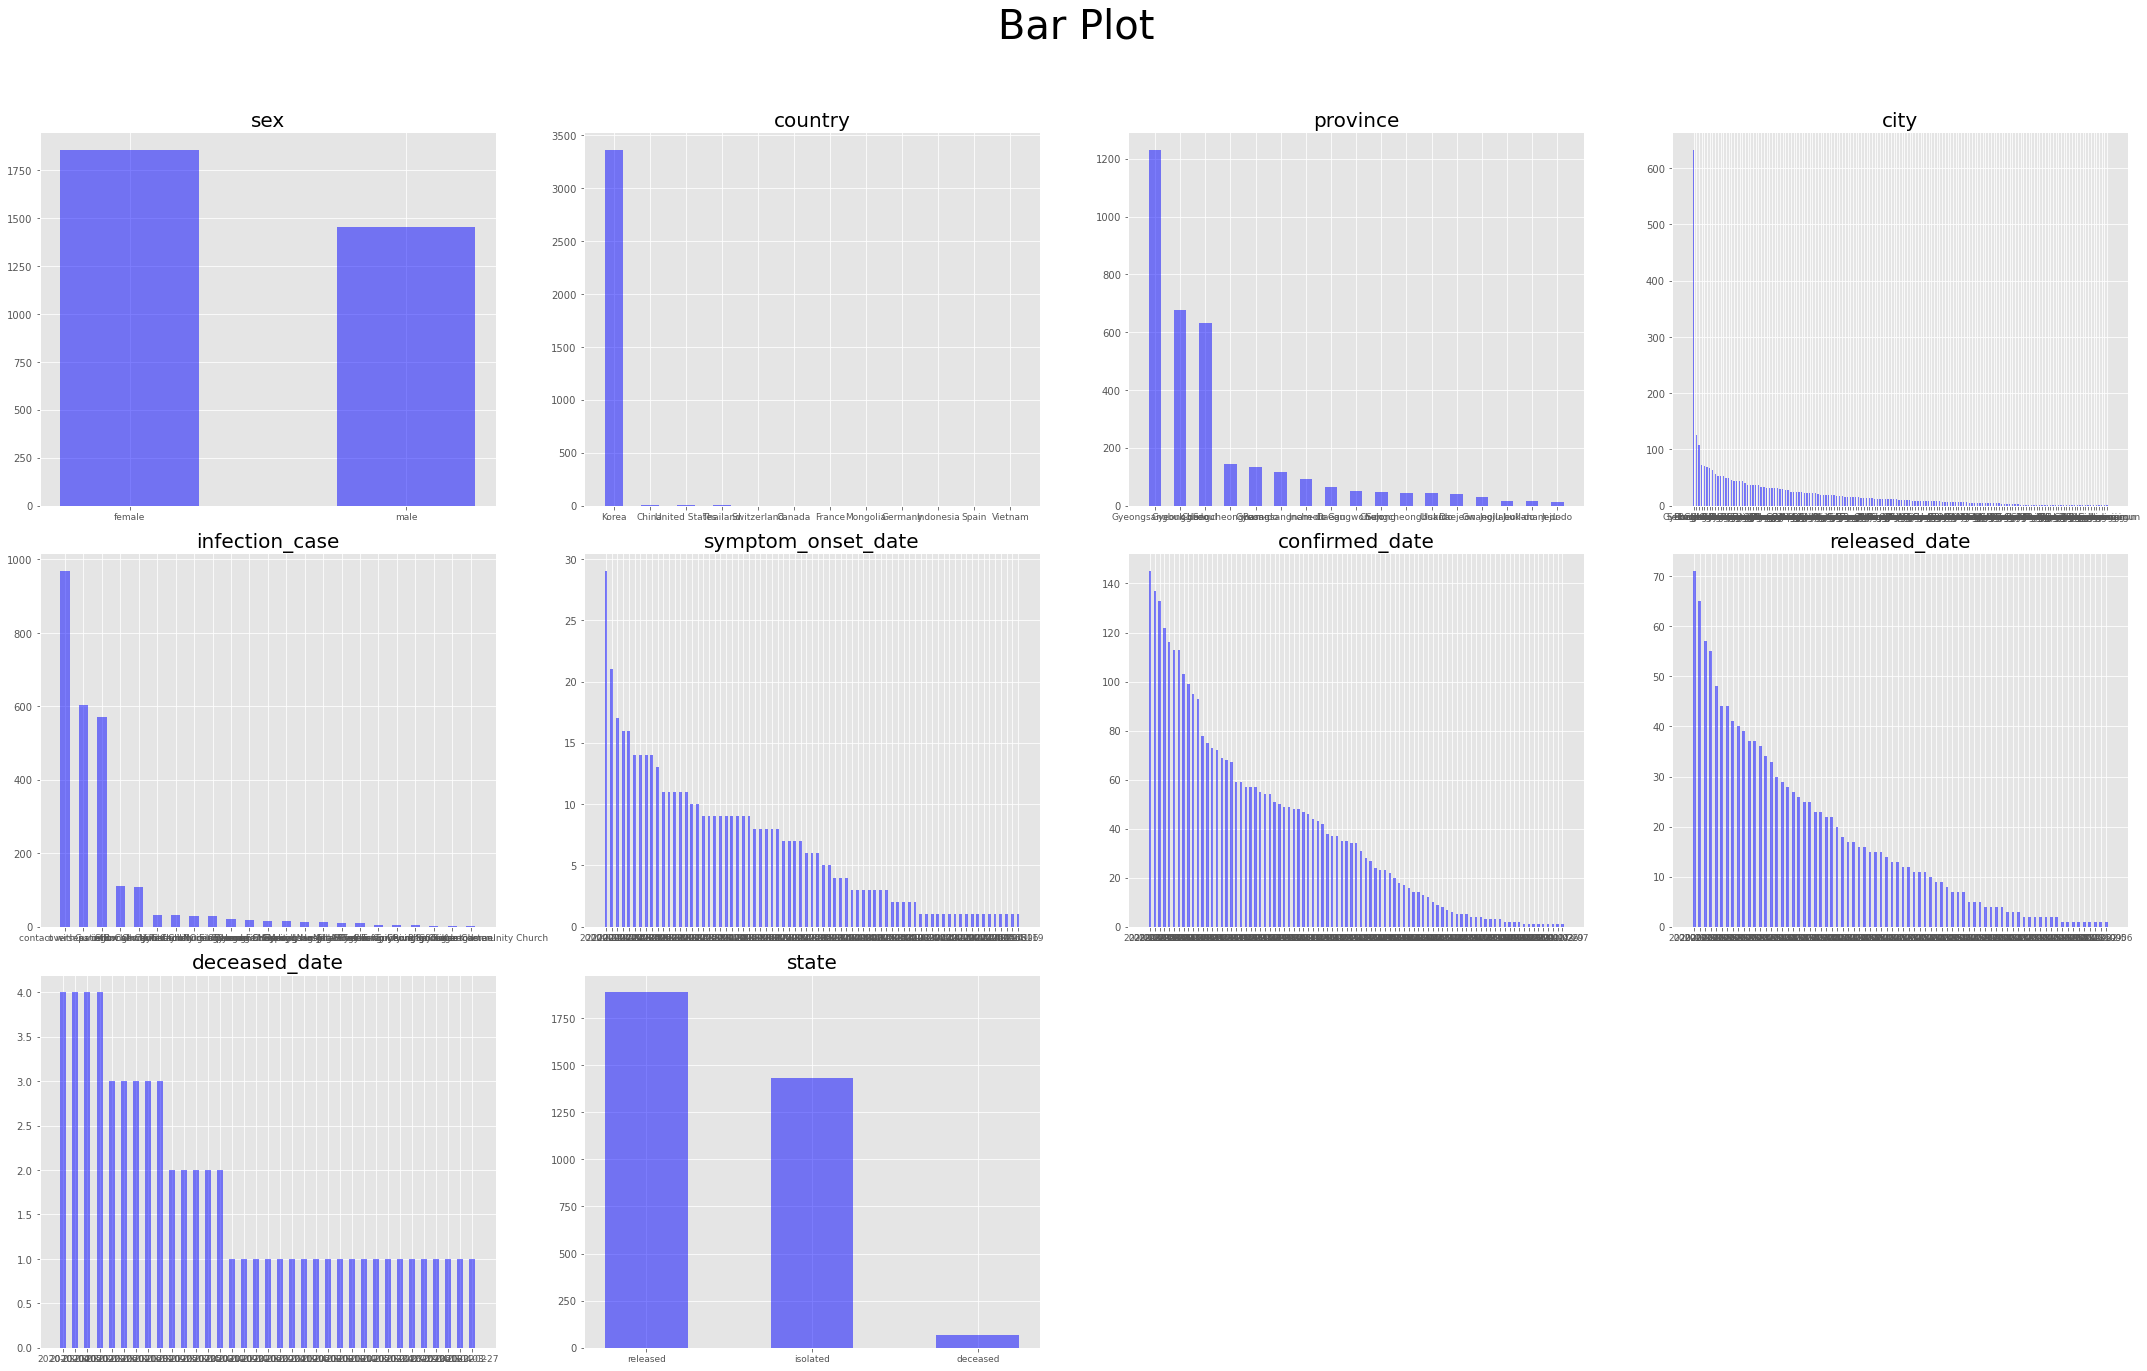

In [35]:
feature = categorical_feature

plt.figure(figsize=(30,20))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(3,4,i+1)
    plt.title(feature[i], fontsize=20)
    temp = patient[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=9)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### <font color=yellow>-> 여성 확진자가 남성 확진자 보다 많음</font>

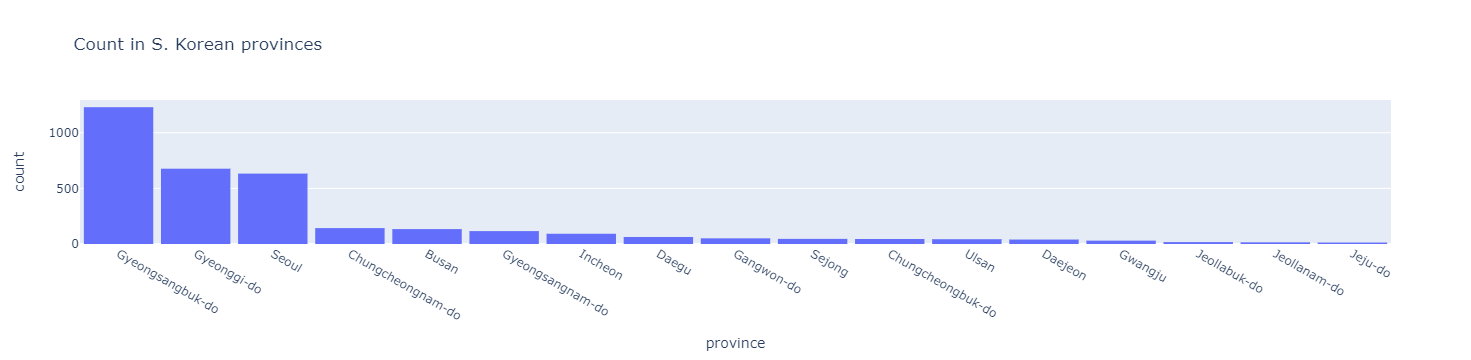

In [38]:
fig = px.histogram(patient, x="province", title='Count in S. Korean provinces', nbins=60).update_xaxes(categoryorder = 'total descending')
fig.update_layout(
    bargap=0.1)
fig.show()

#### <font color=yellow>-> 경상북도, 경기도, 서울 </font>

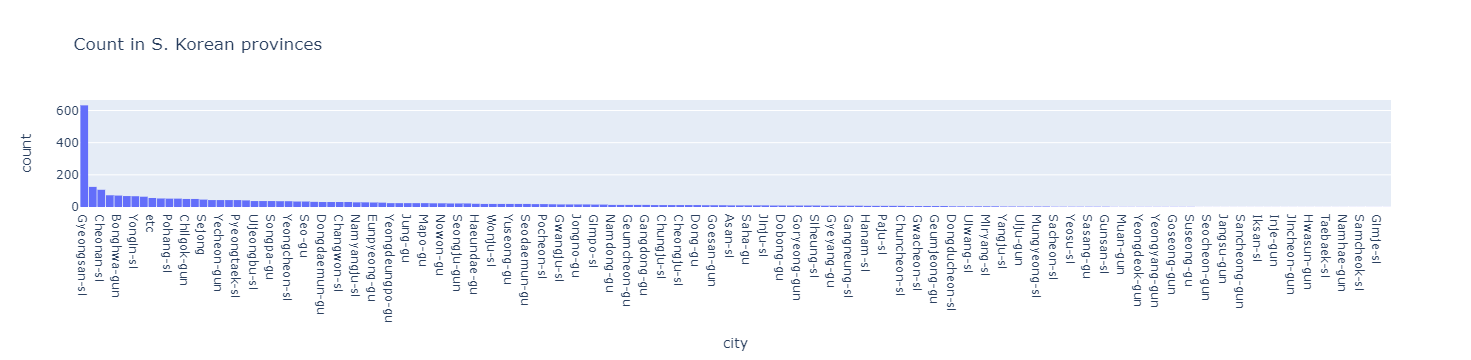

In [52]:
fig = px.histogram(patient, x="city", title='Count in S. Korean provinces', nbins=60).update_xaxes(categoryorder = 'total descending')
fig.update_layout(
    bargap=0.1)
fig.show()

#### <font color=yellow>-> 경산, 성남, 천안 </font>

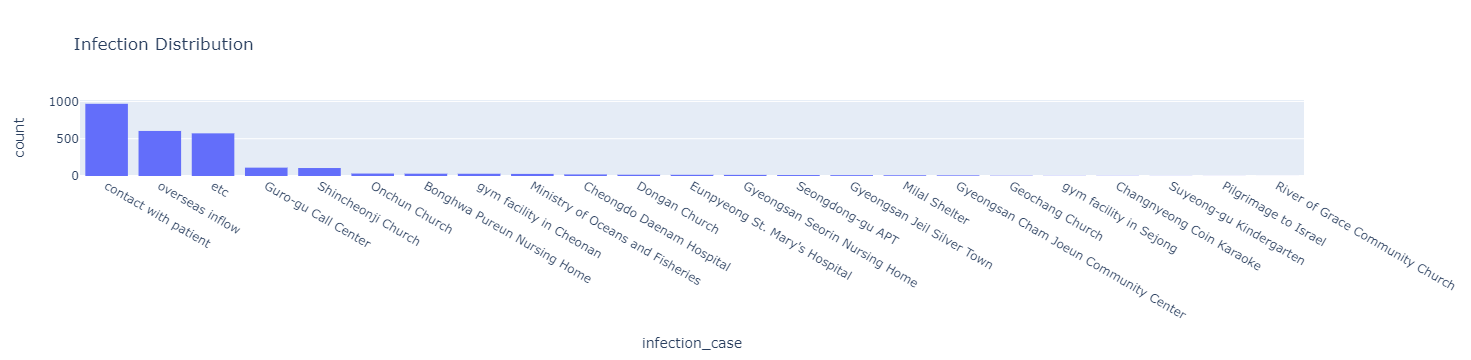

In [40]:
fig = px.histogram(patient, x="infection_case", title='Infection Distribution'). update_xaxes(categoryorder = 'total descending')
fig.show()

#### <font color=yellow>-> 확진자 접촉, 해외 유입 </font>

In [99]:
age_list = 2021 - patient['birth_year'] + 1
patient.insert(3, "Age", age_list)
patient

patient_id  global_num     sex   Age  age  birth_year country  \
0     1400000001         1.0  female  37.0  50s      1985.0   China   
1     1000000001         2.0    male  58.0  30s      1964.0   Korea   
2     2000000001         3.0    male  56.0  50s      1966.0   Korea   
3     2000000002         4.0    male  58.0  20s      1964.0   Korea   
4     1000000002         5.0    male  35.0  20s      1987.0   Korea   
...          ...         ...     ...   ...  ...         ...     ...   
3383  4100000143         NaN    male  41.0  20s      1981.0   Korea   
3384  2000000677         NaN  female  23.0  20s      1999.0   Korea   
3385  6011000051         NaN  female  42.0  30s      1980.0   Korea   
3386  6011000052         NaN  female  11.0  20s      2011.0   Korea   
3387  6011000053         NaN  female  21.0  10s      2001.0   Korea   

               province            city infection_case  infection_order  \
0               Incheon             etc       overseas              NaN   
1                 Seoul      Gangseo-gu       overseas              1.0   
2           Gyeonggi-do       Goyang-si       overseas              1.0   
3           Gyeonggi-do   Pyeongtaek-si       overseas              1.0   
4                 Seoul     Jungnang-gu       overseas              1.0   
...                 ...             ...            ...              ...   
3383  Chungcheongnam-do      Cheonan-si       overseas              NaN   
3384        Gyeonggi-do  Gwangmyeong-si       overseas              NaN   
3385   Gyeongsangbuk-do       Andong-si            etc              NaN   
3386   Gyeongsangbuk-do       Andong-si            etc              NaN   
3387   Gyeongsangbuk-do       Andong-si            etc              NaN   

      infected_by  contact_number symptom_onset_date confirmed_date  \
0             NaN             NaN         2020-01-19     2020-01-20   
1             NaN            75.0         2020-01-22     2020-01-23   
2             NaN            16.0                NaN     2020-01-26   
3             NaN            95.0                NaN     2020-01-27   
4             NaN            31.0                NaN     2020-01-30   
...           ...             ...                ...            ...   
3383          NaN             4.0                NaN     2020-04-28   
3384          NaN             NaN                NaN     2020-04-29   
3385          NaN             NaN                NaN     2020-04-16   
3386          NaN             NaN                NaN     2020-04-16   
3387          NaN             NaN         2020-04-15     2020-04-16   

     released_date deceased_date     state  
0       2020-02-06           NaN  released  
1       2020-02-05           NaN  released  
2       2020-02-12           NaN  released  
3       2020-02-09           NaN  released  
4       2020-03-02           NaN  released  
...            ...           ...       ...  
3383           NaN           NaN  isolated  
3384           NaN           NaN  isolated  
3385           NaN           NaN  isolated  
3386           NaN           NaN  isolated  
3387           NaN           NaN  isolated  

[3388 rows x 18 columns]

In [44]:
age_state_df = patient.filter(['Age','state']).dropna()
age_state_df = pd.get_dummies(age_state_df)
age_state_df

Age  state_deceased  state_isolated  state_released
0     37.0               0               0               1
1     58.0               0               0               1
2     56.0               0               0               1
3     58.0               0               0               1
4     35.0               0               0               1
...    ...             ...             ...             ...
3383  41.0               0               1               0
3384  23.0               0               1               0
3385  42.0               0               1               0
3386  11.0               0               1               0
3387  21.0               0               1               0

[2927 rows x 4 columns]

In [45]:
age_list = age_state_df['Age'].unique()

In [46]:
state_deceased_list, state_isolated_list, state_released_list = [],[],[]

for age in age_list:
    state_deceased_list_i = age_state_df[age_state_df['Age']== age]['state_deceased'].sum()
    state_deceased_list.append(state_deceased_list_i)
    
    state_isolated_list_i = age_state_df[age_state_df['Age']== age]['state_isolated'].sum()
    state_isolated_list.append(state_isolated_list_i)
    
    state_released_list_i = age_state_df[age_state_df['Age']== age]['state_released'].sum()
    state_released_list.append(state_released_list_i)

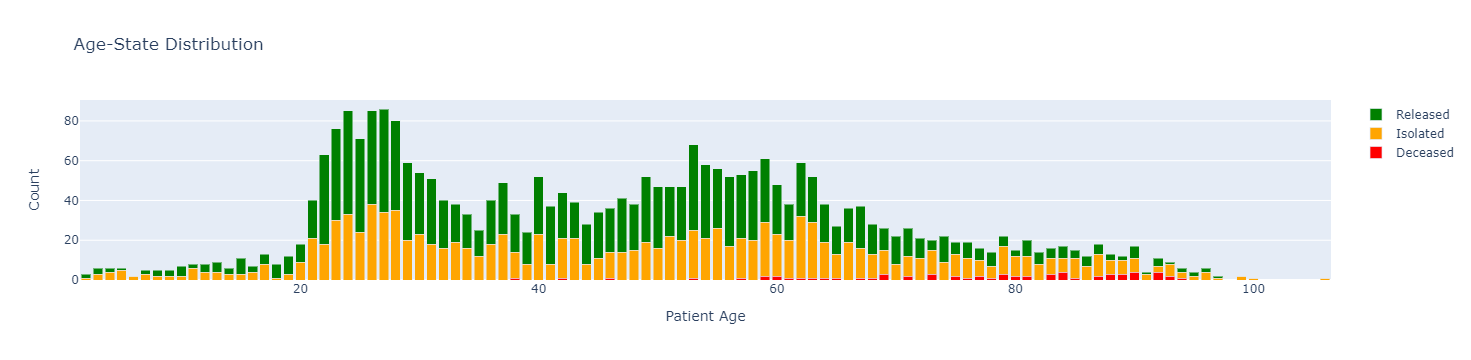

In [47]:
fig = go.Figure(data=[
    go.Bar(name='Deceased', x=age_list, y=state_deceased_list, marker_color='red'),
    go.Bar(name='Isolated', x=age_list, y=state_isolated_list, marker_color='orange'),
    go.Bar(name='Released', x=age_list, y=state_released_list, marker_color='green'),
])
# stack 모드로 barmode 바꿈
fig.update_layout(barmode='stack', title='Age-State Distribution', xaxis_title='Patient Age', yaxis_title='Count')
fig.show()

#### <font color=yellow>-> 20대 발생자가 많음</font>
#### <font color=yellow>->사망자 대부분은 50대 이상인것 확인</font>

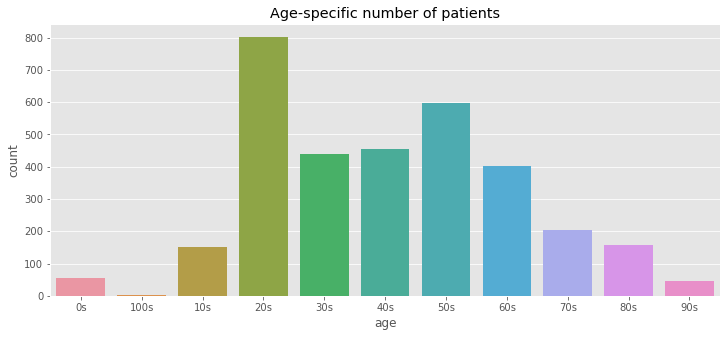

In [161]:
patient.sort_values(by=['age'],axis=0, inplace=True)
plt.figure(figsize= (12,5))
sns.countplot(x="age", data=patient)
plt.title("Age-specific number of patients")
plt.show()

In [55]:
inf_case = patient.infection_case.unique()
for i in range(len(inf_case)) :
    globals()['case'+ str(i)] = patient[patient.infection_case == inf_case[i]]
    globals()['case'+str(i)] = pd.DataFrame(globals()['case'+ str(i)].groupby('confirmed_date').count().cumsum().patient_id).reset_index()
    globals()['case'+str(i)].columns = ['confirmed_date','case'+str(i)]  
merged = case0

In [56]:
isolate_pct = 100 * patient.query('state == "isolated"').shape[0] / patient.shape[0]
release_pct = 100 * patient.query('state == "released"').shape[0] / patient.shape[0]
decease_pct = 100 * patient.query('state == "deceased"').shape[0] / patient.shape[0]

print('전체 환자 중 "격리" 환자는', round(isolate_pct,2),'% 입니다')
print('전체 환자 중 "격리 해제" 환자는', round(release_pct,2),'% 입니다')
print('전체 환자 중 "사망" 환자는', round(decease_pct,2),'% 입니다')

전체 환자 중 "격리" 환자는 42.3 % 입니다
전체 환자 중 "격리 해제" 환자는 55.67 % 입니다
전체 환자 중 "사망" 환자는 2.04 % 입니다


In [270]:
def pie_chart(data, col, title = ''):
    cnt_df = data[col].value_counts().reset_index()
    fig = px.pie(cnt_df, 
                 values = col, 
                 names = 'index', 
                 title = title, 
                 template = 'seaborn',)
#                  color_discrete_sequence=px.colors.sequential.RdBu 
    fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
    fig.show()

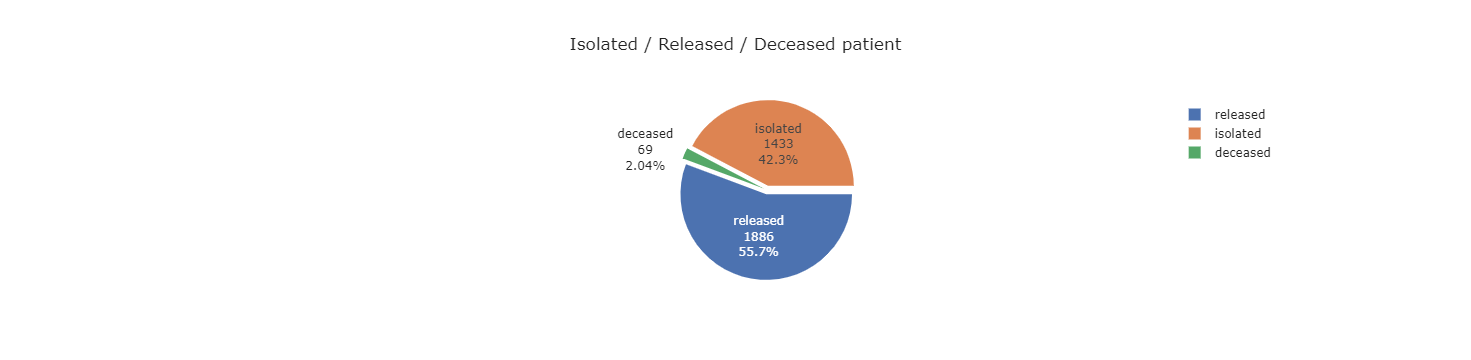

In [271]:
pie_chart(patient, 'state', title = 'Isolated / Released / Deceased patient')

##### <font color=yellow>-> 전체 환자 중 "격리" 환자는 42.3 % 입니다</font>
##### <font color=yellow>-> 전체 환자 중 "격리 해제" 환자는 55.67 % 입니다</font>.
##### <font color=yellow>-> 전체 환자 중 "사망" 환자는 2.04 % 입니다</font>

In [60]:
release = patient.query('state == "released"')
isolate = patient.query('state == "isolated"')
decease = patient.query('state == "deceased"')

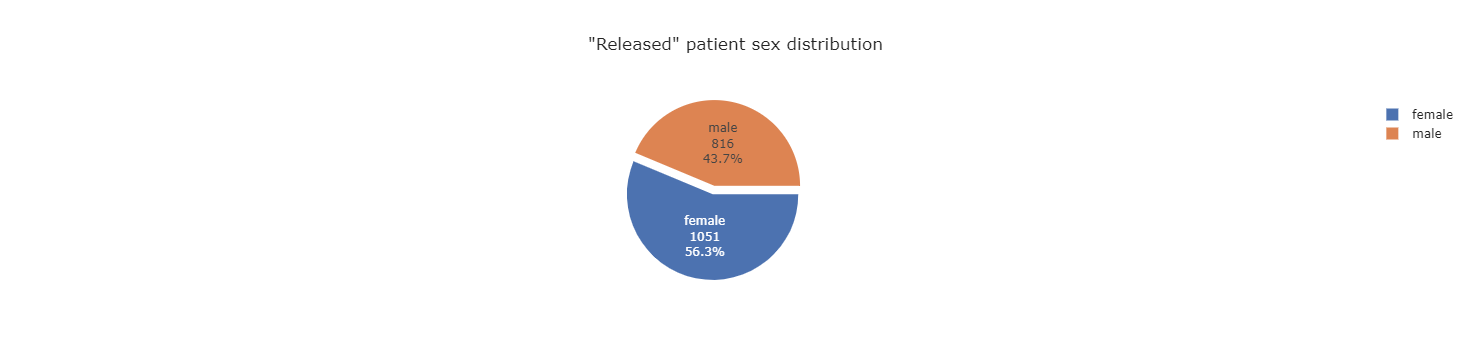

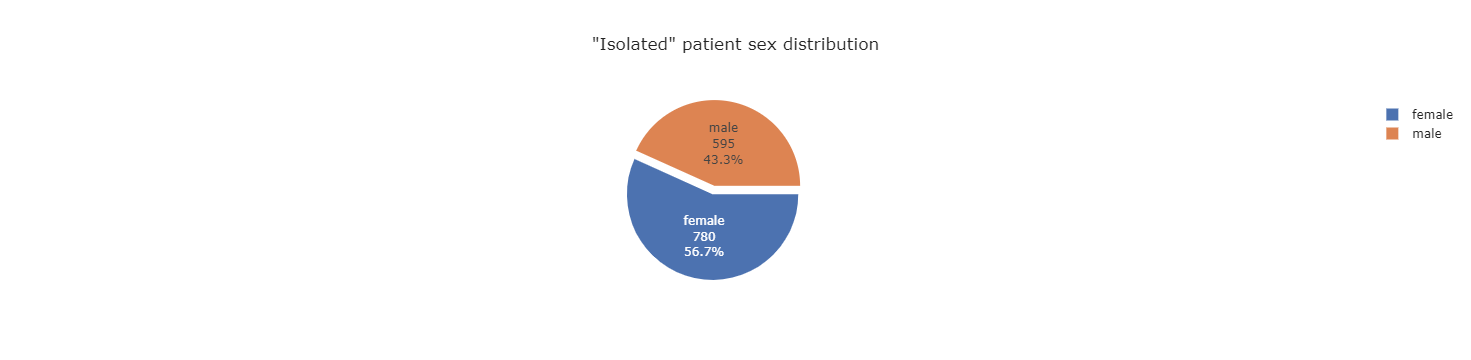

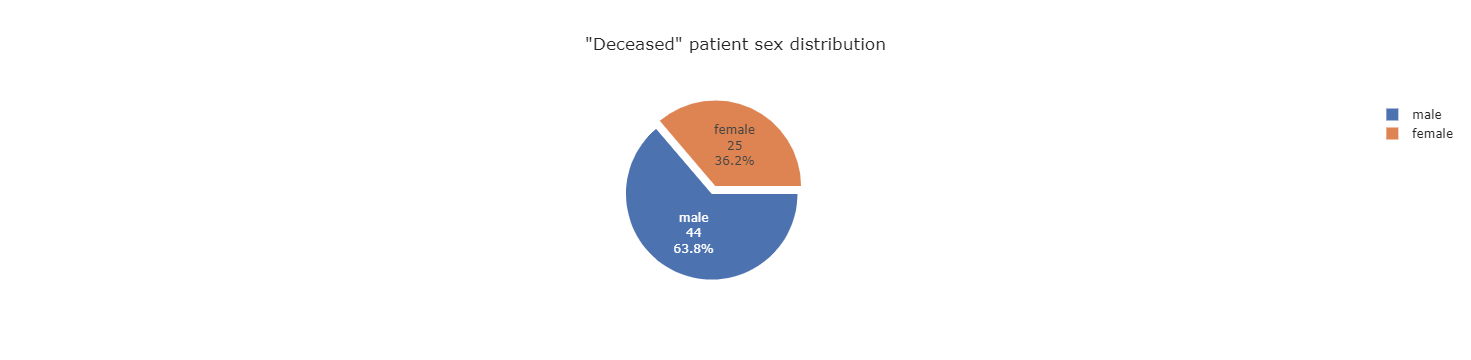

In [272]:
patient['age_2020'] = 2021 - patient['birth_year'] + 1

pie_chart(data = release, col = 'sex', title = '"Released" patient sex distribution')
pie_chart(data = isolate, col = 'sex', title = '"Isolated" patient sex distribution')
pie_chart(data = decease, col = 'sex', title = '"Deceased" patient sex distribution')

#### <font color=yellow>-> 사망자는 여자보다 남자가 많음</font>

In [63]:
inf_case = patient.infection_case.unique()
for i in range(len(inf_case)) :
    globals()['case'+ str(i)] = patient[patient.infection_case == inf_case[i]]
    globals()['case'+str(i)] = pd.DataFrame(globals()['case'+ str(i)].groupby('confirmed_date').count().cumsum().patient_id).reset_index()
    globals()['case'+str(i)].columns = ['confirmed_date','case'+str(i)]  
merged = case0

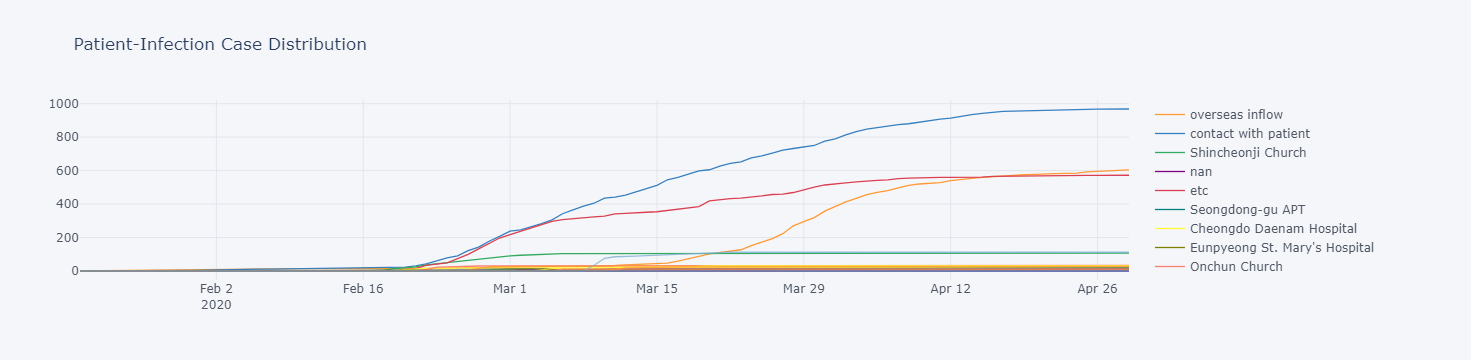

In [64]:
for i in [x for x in range(len(inf_case)) if x != 0] :
    merged = pd.merge(merged , globals()['case'+str(i)],how= 'outer',on='confirmed_date')
merged = merged.sort_values(by = 'confirmed_date').reset_index()
merged = merged.drop('index',axis=1)
merged.columns = np.insert(inf_case,0,'confirmed_date')
merged = merged.fillna(method='pad')
merged = merged.fillna(0)
merged = merged.set_index('confirmed_date')
fig = merged.iplot(asFigure=True, kind='scatter')
fig.update_layout(title='Patient-Infection Case Distribution')
fig.show()

#### <font color=yellow>->접촉에 의한 감염이 가장 많았고 해외 확진자 유입이 3월부터 생기면서 같이 상승하함을 확인</font>

In [138]:
patient_date_group = patient.groupby('confirmed_date')

In [140]:
patient_date_group['confirmed_date'].count()

confirmed_date
2020-01-20    1
2020-01-23    1
2020-01-26    1
2020-01-27    1
2020-01-30    3
             ..
2020-04-25    8
2020-04-26    4
2020-04-27    7
2020-04-28    3
2020-04-29    1
Name: confirmed_date, Length: 87, dtype: int64

In [141]:
confirmed_case_cumsum = list(patient_date_group['confirmed_date'].count().cumsum())

In [142]:
date_list = list(patient['confirmed_date'].dropna().unique())

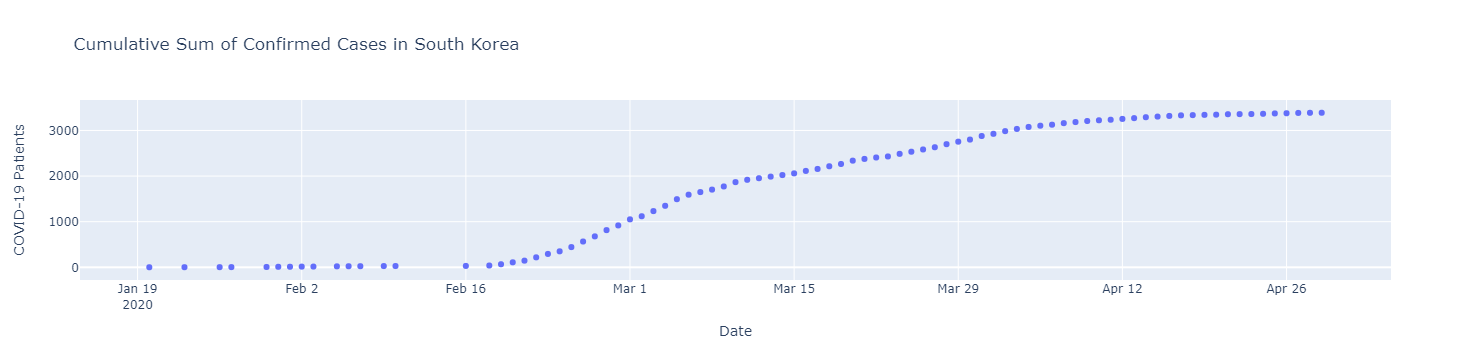

In [143]:
fig = go.Figure(data=go.Scatter(x=date_list, y=confirmed_case_cumsum, mode='markers'))
fig.update_layout(xaxis_title='Date', yaxis_title='COVID-19 Patients', title="Cumulative Sum of Confirmed Cases in South Korea")
fig.show()

In [364]:
from scipy.interpolate import splrep, splev
def spline_interp(x, y, x_new):
    tck = splrep(x, y)
    return splev(x_new, tck)

In [365]:
# 연속날짜로 배열 생성
df_interp = pd.DataFrame()
df_interp['dates'] = np.arange(date_list[0], get_str_from_date(date_list[-1], add_day=True), dtype='datetime64[D]')

In [366]:
# 결측날짜에 대한 스플라인 보간 누적 합 찾기
import matplotlib.dates as mdates
datetime_date_list = [datetime.strptime(d, '%Y-%m-%d') for d in date_list]
df_interp['cum_sum'] = spline_interp(mdates.date2num(datetime_date_list), confirmed_case_cumsum, mdates.date2num(df_interp['dates']))

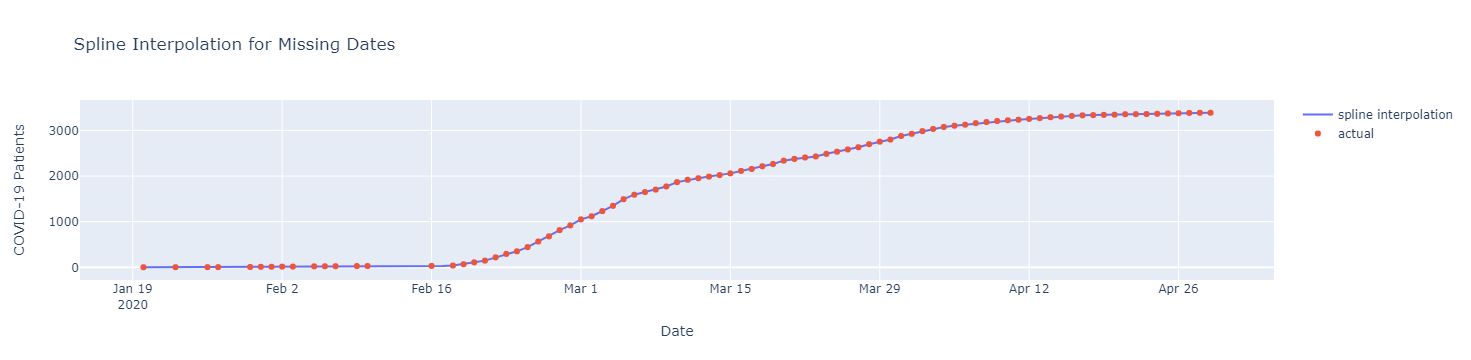

In [367]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=df_interp['dates'], y=df_interp['cum_sum'], mode='lines', name='spline interpolation'))
fig2.add_trace(go.Scatter(x=date_list, y=confirmed_case_cumsum, mode='markers', name='actual'))
fig2.update_layout(xaxis_title='Date', yaxis_title='COVID-19 Patients', title="Spline Interpolation for Missing Dates")
fig2.show()

In [333]:
regional_count = climate[['latitude','longitude']].dropna() #결측치 드랍
m = folium.Map([36, 128], zoom_start=7)
plugins.MousePosition().add_to(m) 
plugins.MarkerCluster(regional_count).add_to(m)
m

# Climate Data Visualization

In [254]:
climate.head(5)

date     province  sunshine_hr  total_suntime_hr  sun_time_hhmi  \
0  2020-01-20      Incheon         10.3               8.0           1400   
1  2020-01-23        Seoul         10.2               5.5           1300   
2  2020-01-26  Gyeonggi-do         10.2               6.7           1200   
3  2020-01-27  Gyeonggi-do         10.1               0.0           1200   
4  2020-01-30        Seoul         10.3               5.5           1200   

   sun_amount_MJ_m2  total_sun_amount_MJ_m2  ave_tem  mini_tem  mini_tem_hhmi  \
0              1.90                    8.92      1.5      -2.2           2230   
1              0.65                    2.70      4.6      -0.2            746   
2              0.88                    4.42      4.5      -4.0            812   
3              0.19                    1.18      5.6       3.2           2052   
4              2.26                    9.24      5.7       2.3            758   

   ...  max_wind_direction_deg  Num_Covid  SO2max  COmax  O3max  NO2max  \
0  ...                   315.0          0   0.006    0.9  0.039   0.049   
1  ...                     0.0          0   0.014    1.2  0.049   0.059   
2  ...                    84.4          0   0.004    0.9  0.042   0.038   
3  ...                    47.8          0   0.003    0.3  0.038   0.022   
4  ...                   340.3          1   0.003    0.7  0.026   0.044   

   PM10max  PM25max   latitude   longitude  
0       66       50  37.410262  126.678309  
1       88       49  37.551166  126.849506  
2       53       40  37.658363  126.831961  
3       28        6  36.992293  127.112709  
4       27       10  37.606832  127.092656  

[5 rows x 26 columns]

In [358]:
numeric_feature = climate.columns[(climate.dtypes==int) | (climate.dtypes== float)]
print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))

수치형 데이터는 다음과 같습니다. 
 ['sunshine_hr', 'total_suntime_hr', 'sun_amount_MJ_m2', 'total_sun_amount_MJ_m2', 'ave_tem', 'mini_tem', 'max_tem', 'day_prec_mm', 'max_wind_speed_m.s', 'ave_wind_speed_m.s', 'max_wind_direction_deg', 'SO2max', 'COmax', 'O3max', 'NO2max', 'latitude', 'longitude']


In [356]:
numeric_feature = climate.select_dtypes(include=['int64', 'float64'])
numeric_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sunshine_hr             3388 non-null   float64
 1   total_suntime_hr        3388 non-null   float64
 2   sun_time_hhmi           3388 non-null   int64  
 3   sun_amount_MJ_m2        3388 non-null   float64
 4   total_sun_amount_MJ_m2  3388 non-null   float64
 5   ave_tem                 3388 non-null   float64
 6   mini_tem                3388 non-null   float64
 7   mini_tem_hhmi           3388 non-null   int64  
 8   max_tem                 3388 non-null   float64
 9   max_tem_hhmi            3388 non-null   int64  
 10  day_prec_mm             3388 non-null   float64
 11  max_wind_speed_m.s      3388 non-null   float64
 12  max_wind_speed_hhmi     3388 non-null   int64  
 13  ave_wind_speed_m.s      3388 non-null   float64
 14  max_wind_direction_deg  3388 non-null   

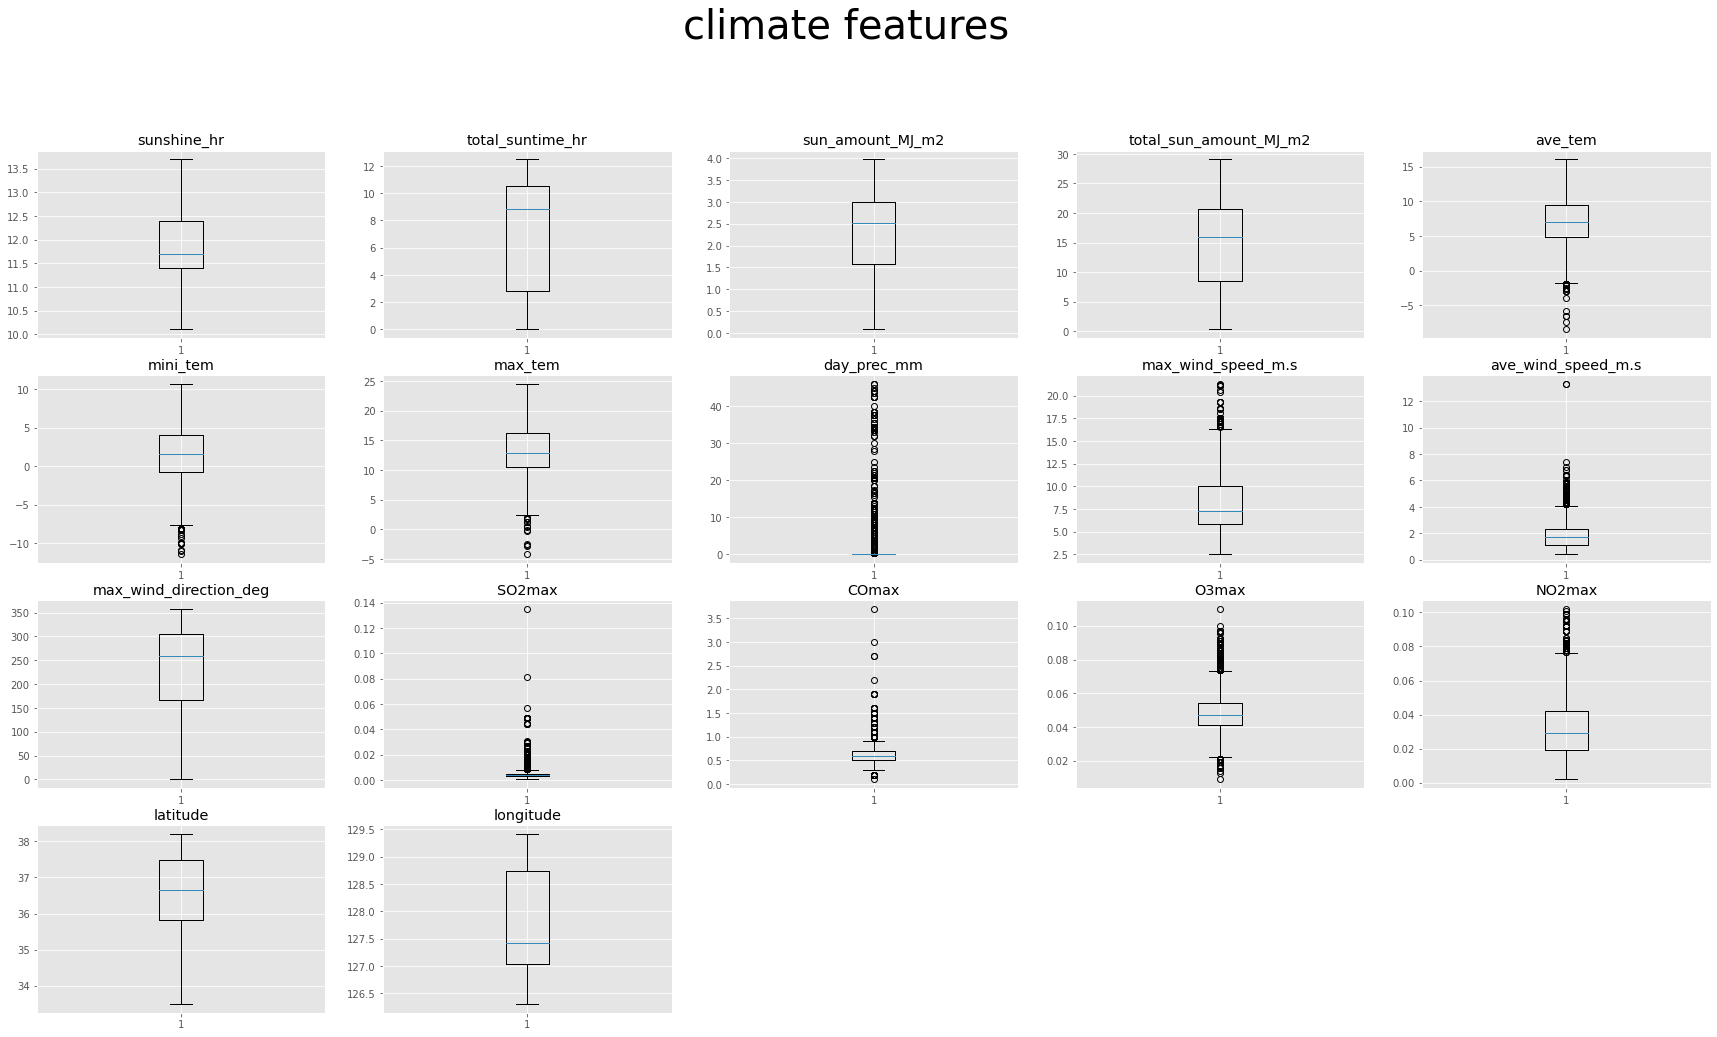

In [359]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

plt.figure(figsize=(30,20))
plt.suptitle("climate features", fontsize=40)

for i in range(len(feature)):
    plt.subplot(5,5,i+1)
    plt.title(feature[i])
    plt.boxplot(climate[feature[i]])
plt.show()

In [362]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환
from sklearn.preprocessing import LabelEncoder

corr_df = climate.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

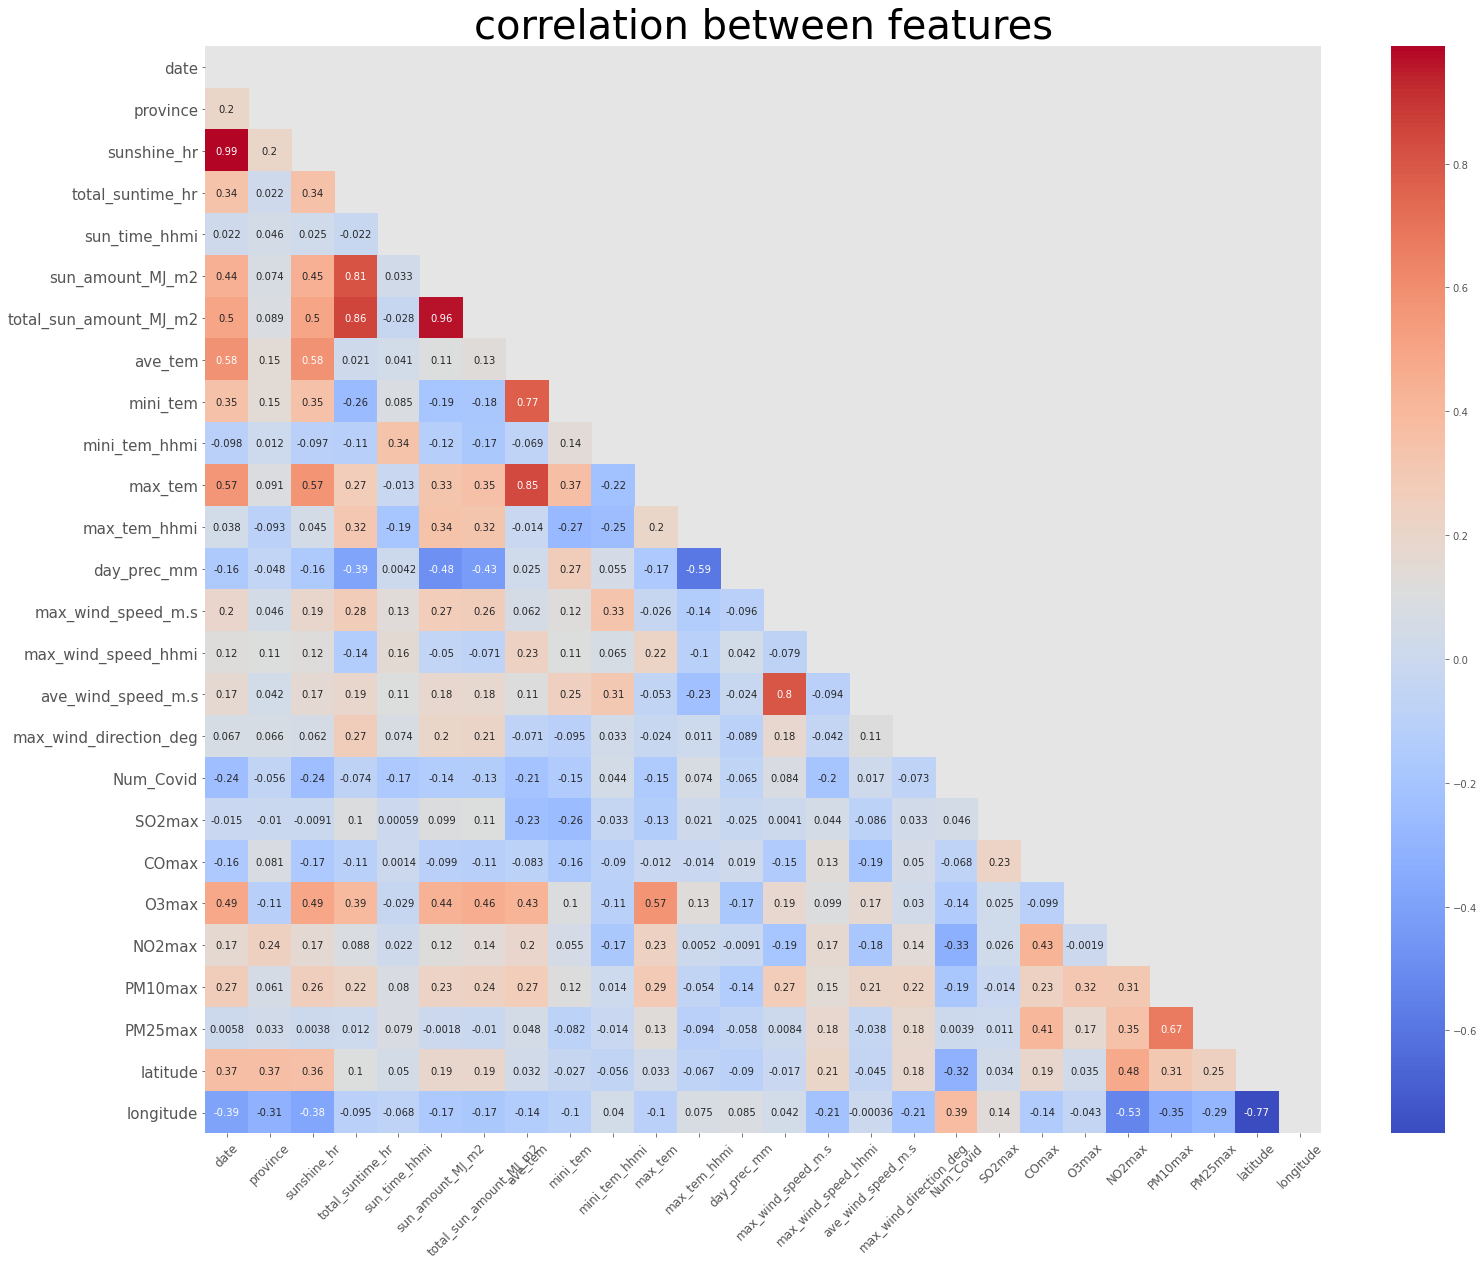

In [401]:
#상관관계 분석도
import seaborn as sns

plt.figure(figsize=(25,20))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=12, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [411]:
# climate_corr = climate.corr()
# climate_corr
# climate_corr.sort_values(by = ['PM10max'],
#                            axis = 0,
#                            ascending = False,
#                            inplace = False,
#                            kind = 'quicksort')

In [428]:
print(climate.corr()[['PM10max']].sort_values(by='PM10max', ascending=False))

                         PM10max
PM10max                 1.000000
PM25max                 0.668358
O3max                   0.315796
latitude                0.307645
NO2max                  0.306014
max_tem                 0.290414
ave_tem                 0.274605
max_wind_speed_m.s      0.274266
sunshine_hr             0.259017
total_sun_amount_MJ_m2  0.240627
COmax                   0.233751
sun_amount_MJ_m2        0.227705
max_wind_direction_deg  0.220080
total_suntime_hr        0.216766
ave_wind_speed_m.s      0.212189
max_wind_speed_hhmi     0.147789
mini_tem                0.115656
sun_time_hhmi           0.079876
mini_tem_hhmi           0.014494
SO2max                 -0.013979
max_tem_hhmi           -0.054304
day_prec_mm            -0.141234
Num_Covid              -0.187066
longitude              -0.350320


In [426]:
climate_corr_ylabels = climate.corr()[['PM10max']].sort_values(by='PM10max', ascending=False).index.tolist()

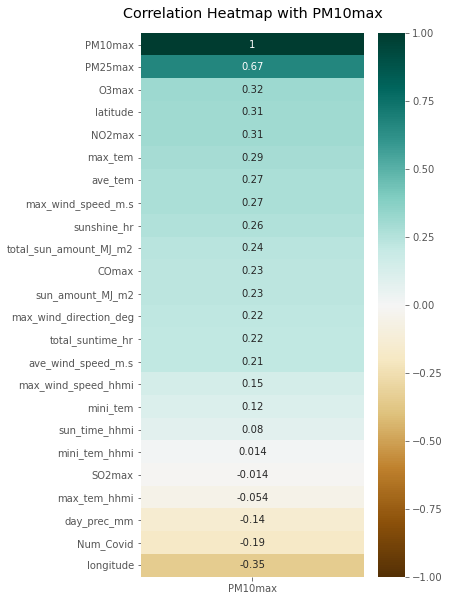

In [427]:
climate.corr()[['PM10max']].sort_values(by='PM10max', ascending=False).index
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(climate.corr()[['PM10max']].sort_values(by='PM10max', ascending=False), 
            vmin = -1, vmax = 1, annot=True, cmap="BrBG")
ax.set_title('Correlation Heatmap with PM10max', pad = 15)
ax.set_yticklabels(climate_corr_ylabels, rotation=0) 
# y축을 가로형으로 변환
plt.show()

In [436]:
patient_climate_df = pd.read_csv('final_dataset_2.8.csv', encoding='cp949')

In [438]:
numeric_feature = patient_climate_df.columns[(patient_climate_df.dtypes==int) | (patient_climate_df.dtypes== float)]
categorical_feature = patient_climate_df.columns[patient_climate_df.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['global_num', 'birth_year', 'infection_order', 'infected_by', 'contact_number', 'sunshine_hr', 'total_suntime_hr', 'sun_amount_MJ_m2', 'total_sun_amount_MJ_m2', 'ave_tem', 'mini_tem', 'max_tem', 'day_prec_mm', 'max_wind_speed_m.s', 'ave_wind_speed_m.s', 'max_wind_direction_deg', 'SO2max', 'COmax', 'O3max', 'NO2max']
카테고리형 데이터는 다음과 같습니다. 
 ['date', 'region', 'sex', 'age', 'country', 'province', 'disease', 'infection_case', 'symptom_onset_date', 'confirmed_date', 'released_date', 'deceased_date', 'state']


#### Target과 다른 numeric_feature 들과의 관계 확인 하기

In [439]:
target = "PM10max"

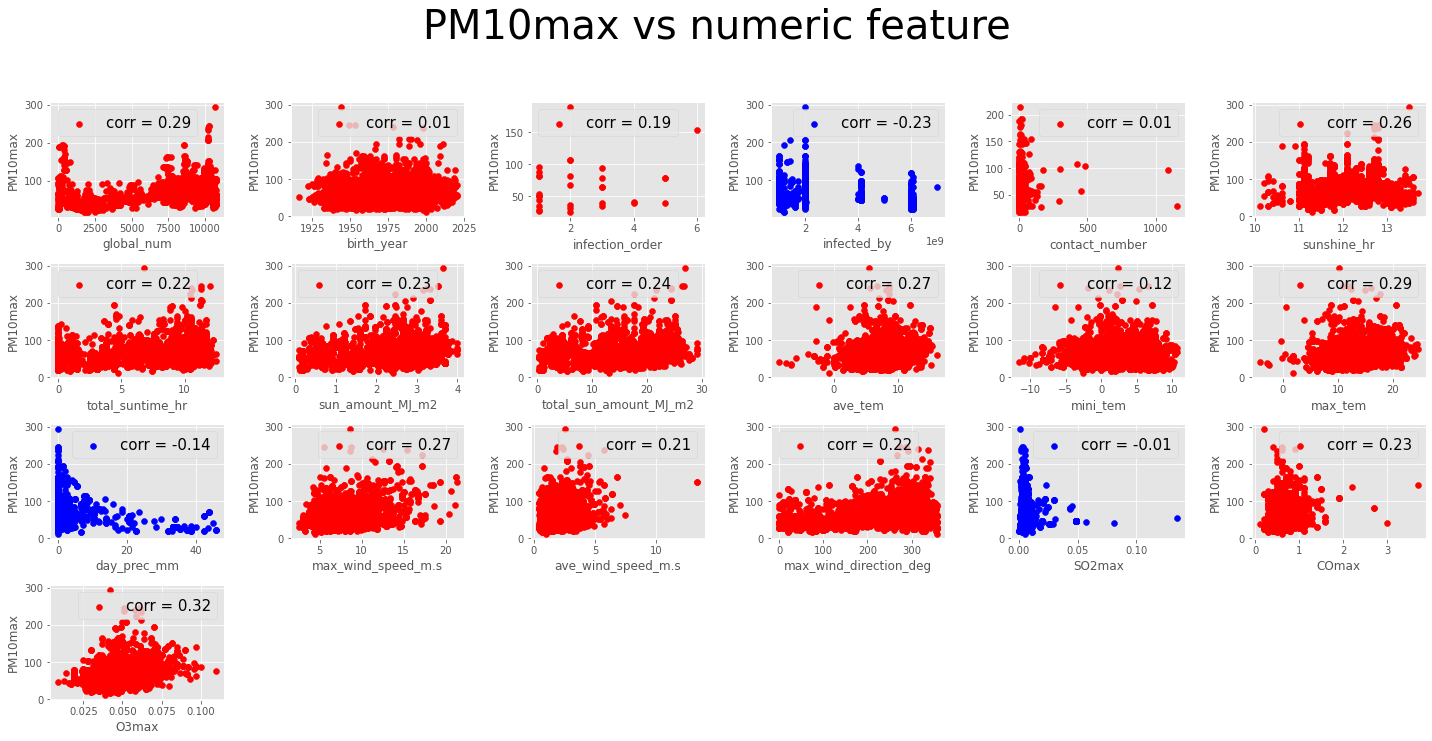

In [449]:
feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("PM10max vs numeric feature", fontsize=40)

# id는 제외
for i in range(len(feature[:-1])):
    plt.subplot(6,6,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = patient_climate_df[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(patient_climate_df[feature[i]], patient_climate_df[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Target과 categorical_feature 의 관계

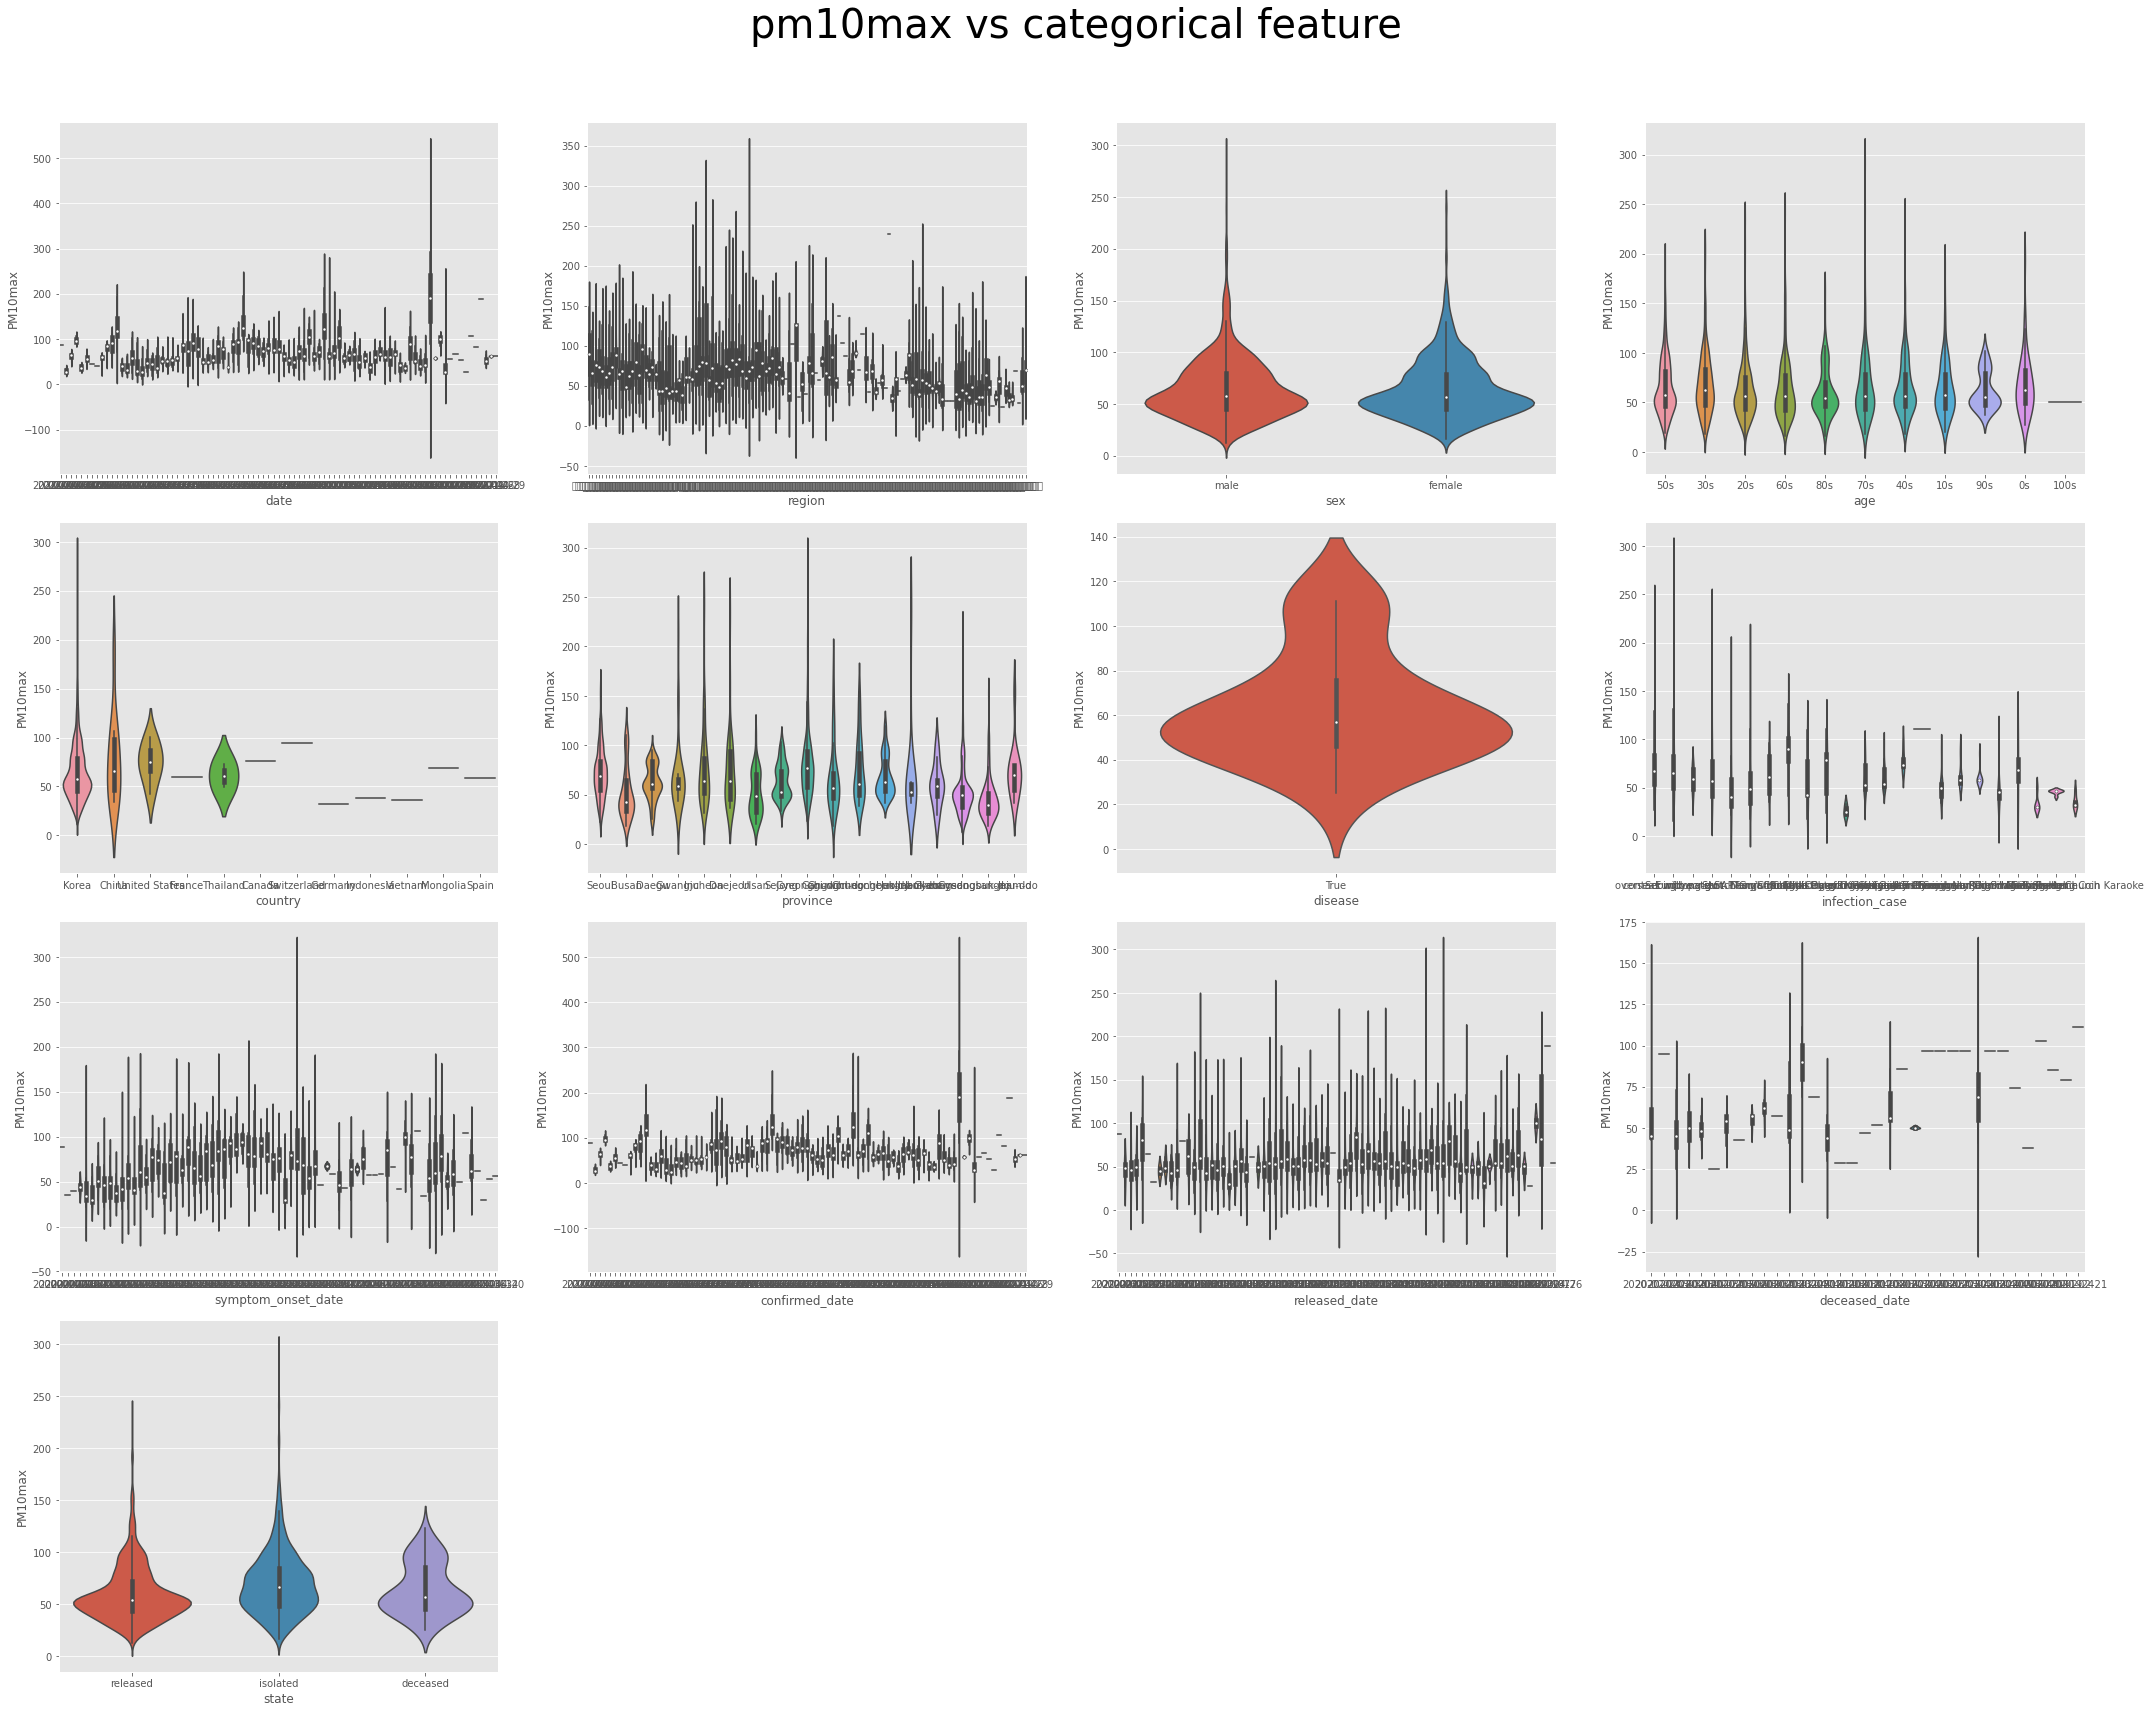

In [441]:
feature = categorical_feature

plt.figure(figsize=(30,25))
plt.suptitle("pm10max vs categorical feature", fontsize=40)

# id는 제외
for i in range(len(feature)):
    plt.subplot(4,4,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= patient_climate_df[feature[i]], y= patient_climate_df[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
#카테고리에 따라 target feature pm10max 가 어느 정도 차이를 보이는지 알 수 있다. 

In [446]:
# feature = categorical_feature

# plt.figure(figsize=(30,25))
# plt.suptitle("pm10max vs categorical feature", fontsize=40)

# # id는 제외
# for i in range(len(feature)):
#     plt.xlabel(feature[i])
#     plt.ylabel(target)
#     sns.violinplot(x= patient_climate_df['deceased_date'], y= patient_climate_df[target])
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

#### 2가지 insight
#### ->20대 확진자가 많다.
#### ->남자 사망자가 많다.

In [354]:
#20대가 많이 돌아다니나? 해외유입이 많나? 대구와 서울에 20대 인구가 많나?

![](./2.jpg)

In [340]:
patient['infection_case'] = patient['infection_case'].astype(str).apply(lambda x : x.split()[0])
infectionCase = patient.pivot_table(index='infection_case',columns='age',
                                        values='patient_id', aggfunc='count')
# 전체 감염 케이스
patientTotal = infectionCase.fillna(0).sum(axis=1)
patientTotal = patientTotal.sort_values(ascending=False)[:5]
# 20대 감염 케이스
patient20s = infectionCase['20s'].dropna()
patient20sTop = patient20s.sort_values(ascending=False)[:5]

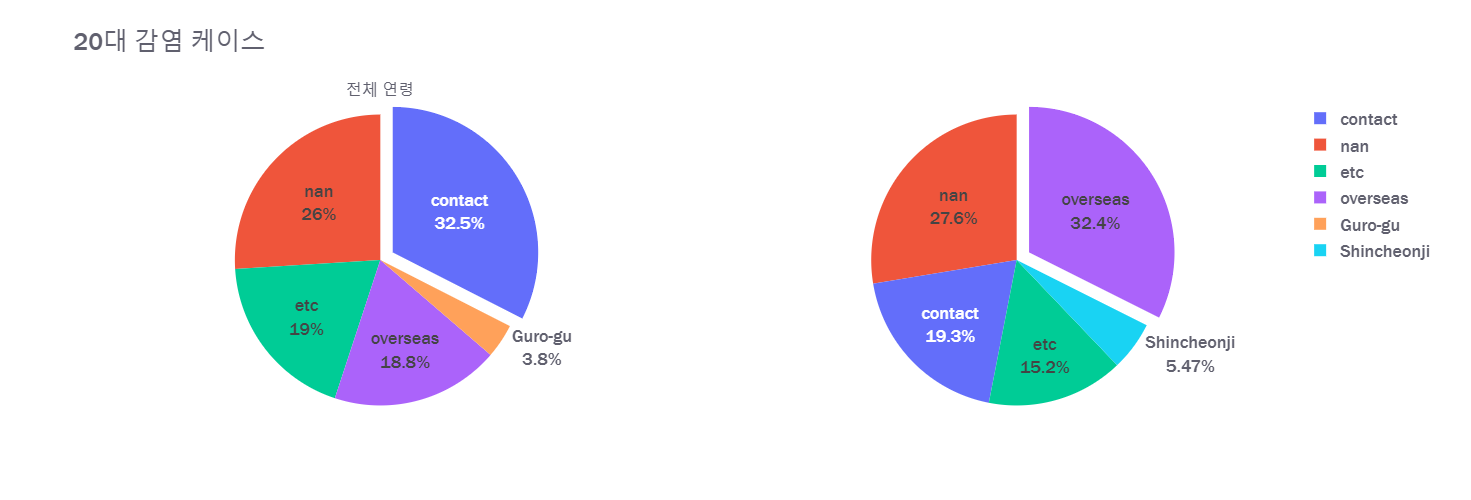

In [341]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['전체 연령'])

fig.add_trace(go.Pie(values=patientTotal.values, labels=patientTotal.index, 
                    name='>', pull=[.1,0]),row=1,col=1)
fig.add_trace(go.Pie(values=patient20sTop.values, labels=patient20sTop.index, 
                    name='>', pull=[.1,0]),row=1,col=2,)

fig.update_traces(textinfo="percent+label")
fig.update_layout(title='20대 감염 케이스', **layout_font, showlegend=True,
                 height=500)
fig.show()

#### <font color=yellow>->해외에서 유입되는 20대들이 (32.4%) 많은것을 확인 할 수있다.</font>
###### <font color=yellow>->결측치와 etc 부분이 많음.</font>

![](./3.jpg)

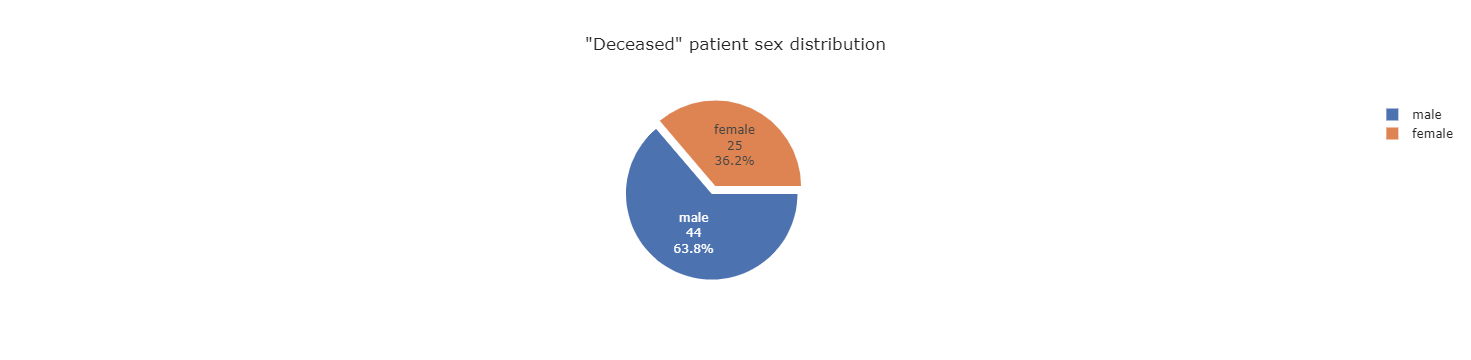

In [343]:
pie_chart(data = decease, col = 'sex', title = '"Deceased" patient sex distribution')

![](./5.jpg)

![](./4.jpg)

In [344]:
obes_df = pd.read_csv('./obes.csv')
#국가지표체계

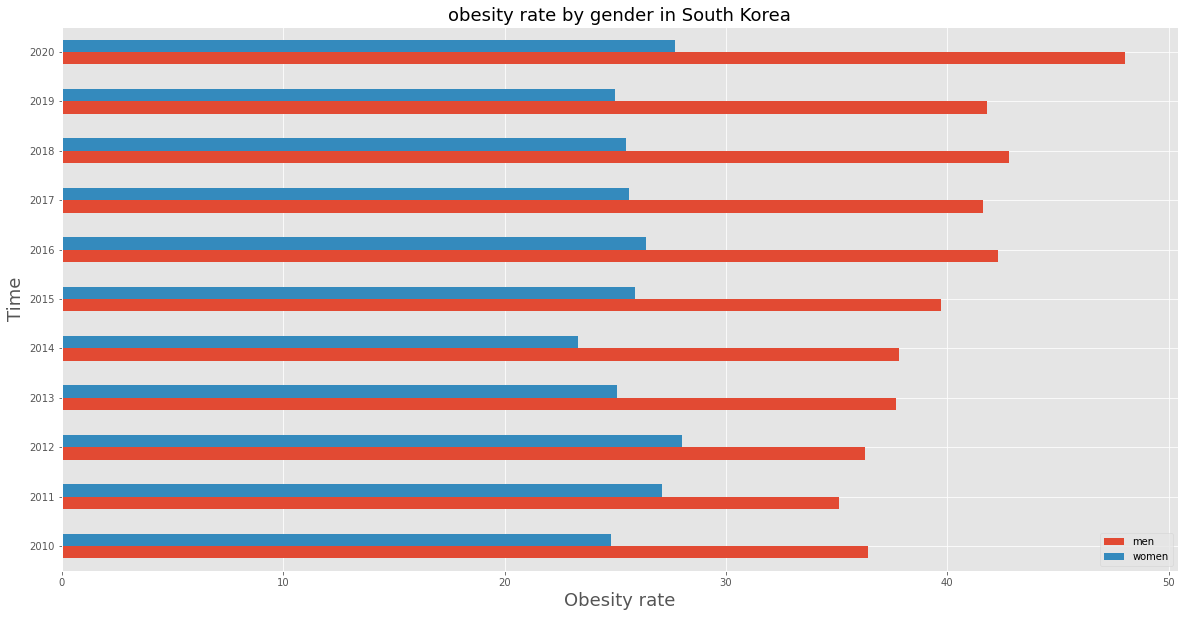

In [349]:
obes_df.plot(kind='barh', x = "time", figsize=(20,10))
plt.title('obesity rate by gender in South Korea',fontsize=18)
plt.xlabel('Obesity rate', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

In [350]:
smoke_df = pd.read_csv('./smoke.csv')
#OECD

In [351]:
smoke_df = pd.DataFrame(smoke_df[smoke_df['TIME']==2019].groupby(['SUBJECT','LOCATION'])['Value'].sum()).reset_index()
smoke_df_m = smoke_df[smoke_df['SUBJECT']=='MEN'].sort_values(by='LOCATION',ascending=False)
smoke_df_f = smoke_df[smoke_df['SUBJECT']=='WOMEN'].sort_values(by='LOCATION',ascending=False)

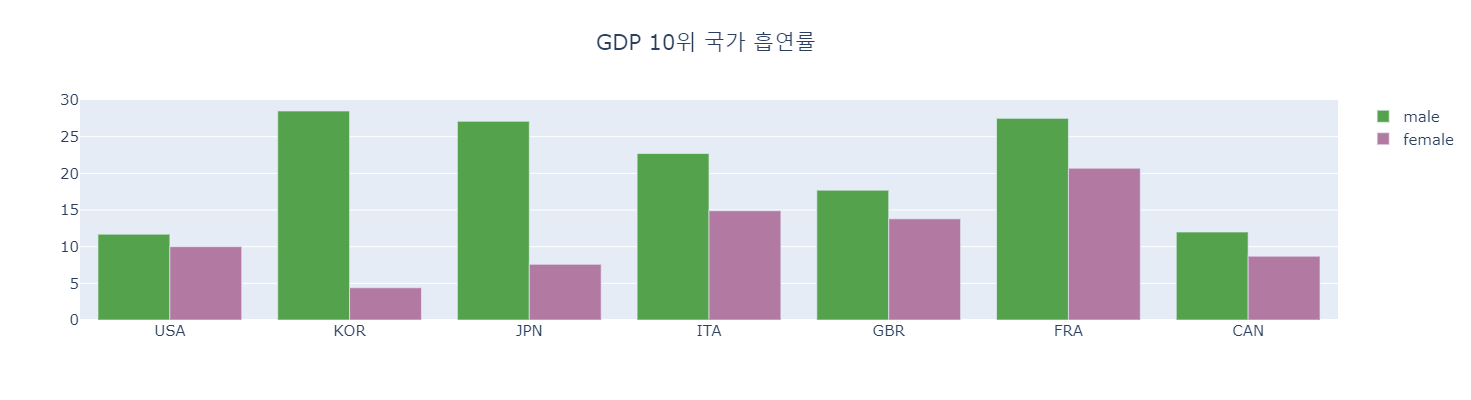

In [353]:
fig = go.Figure()
fig.add_trace(go.Bar(x=smoke_df_m['LOCATION'], y=smoke_df_m['Value'],name='male',marker_color=px.colors.qualitative.T10[4]))
fig.add_trace(go.Bar(x=smoke_df_f['LOCATION'], y=smoke_df_f['Value'],name='female',marker_color=px.colors.qualitative.T10[6]))
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', barmode='group',
                  width=800,height=400,title='GDP 10위 국가 흡연률',title_x=0.48,font_size=15)
fig.show()

In [ ]:
20대 발생자가 많은거 -> 20대가 많이 돌아다니나? 해외유입이 많나? 대구와 서울에 20대 인구가 많나?
남자가 더 많이 죽는거 -> 흡연? 남자가 비만?
마지막에 6일 예측
까지 하고 마무리
스크립트 정리
climate data 오픈 엔딩으로
모빌리티 데이터 스샷 추가

#### 2가지 insight
#### ->남자 사망자가 많다.
#### ->20대 확진자가 많다.

In [ ]:
#     string 을 날짜로 바꿔주고 하루를 추가함 추가된 날짜를 string format 으로 변환
#     Inputs:
#     - str_date: dates in string format
#     - add_day: if True add a day to the dates
#     Returns:
#     - dates as datetime object

In [264]:
from datetime import datetime
from datetime import timedelta

converted_date_list = []

def get_str_from_date(str_date, add_day=False):

    if add_day:
        datetime_obj = datetime.strptime(str_date, '%Y-%m-%d') + timedelta(days=1)
        
    elif len(str_date) > 1:
        for d in str_date:
            datetime_obj_i = datetime.strptime(d, '%Y-%m-%d')
            datetime_obj_i = datetime_obj_i.strftime('%Y-%m-%d')
            converted_date_list.append(datetime_obj_i)
        return converted_date_list
    
    else:
        datetime_obj = datetime.strptime(str_date, '%Y-%m-%d')
        
    return datetime_obj.strftime('%Y-%m-%d')

In [ ]:
#     Spline interpolation for missing dates
#     결측 날짜를 스플라인 보간 해줌 자연스러운 곡선으로 표현
#     Inputs:
#     x: dates
#     y: cumulative sum of confirmed cases
#     x_new: dates  for which cumulative sum needs to be interpolated
#     Returns:
#     Interpolated cumulative sum

In [265]:
from scipy.interpolate import splrep, splev

def spline_interp(x, y, x_new):

    tck = splrep(x, y)
    return splev(x_new, tck)

In [267]:
# Creating a continous date array
df_interp = pd.DataFrame()
df_interp['dates'] = np.arange(date_list[0], get_str_from_date(date_list[-1], add_day=True), dtype='datetime64[D]')

In [268]:
# Finding spline interpolated cumulative sum for missing dates
import matplotlib.dates as mdates

datetime_date_list = [datetime.strptime(d, '%Y-%m-%d') for d in date_list]
df_interp['cum_sum'] = spline_interp(mdates.date2num(datetime_date_list), confirmed_case_cumsum, mdates.date2num(df_interp['dates']))

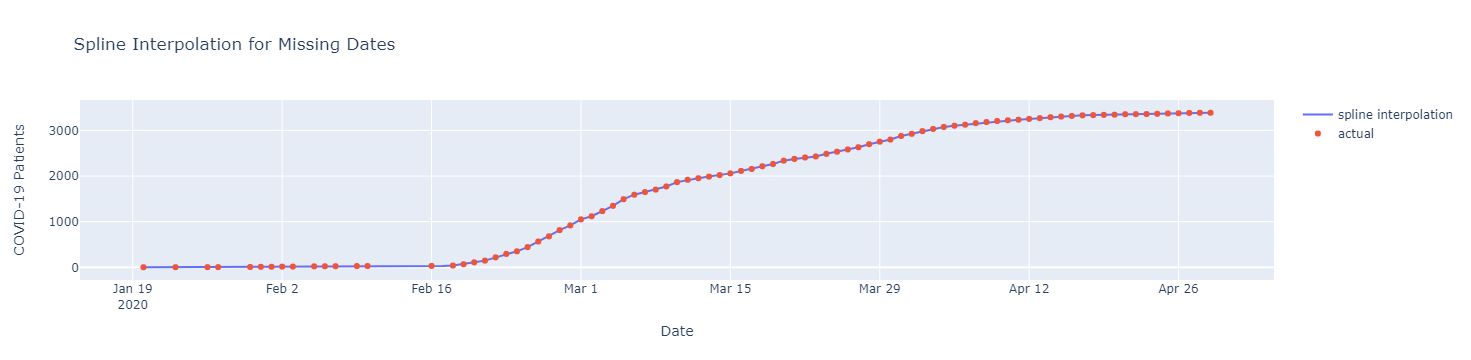

In [269]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=df_interp['dates'], y=df_interp['cum_sum'], mode='lines', name='spline interpolation'))
fig2.add_trace(go.Scatter(x=date_list, y=confirmed_case_cumsum, mode='markers', name='actual'))
fig2.update_layout(xaxis_title='Date', yaxis_title='COVID-19 Patients', title="Spline Interpolation for Missing Dates")
fig2.show()

### forecasting next 7days

In [374]:
forecast_days = 7

In [375]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def get_exp_smoothing_forecast(end_date, forecast_days):
    series_interp = pd.Series(df_interp['cum_sum'].values, 
                          pd.date_range(start=date_list[0], end=date_list[-1], freq='D'))
    model = ExponentialSmoothing(series_interp, trend='add', damped=True).fit(damping_slope=0.91, optimized=True)
    forecasted_df = pd.concat([series_interp, model.forecast(forecast_days)])
    return forecasted_df, model

In [376]:
# Creates and trains ExponentialSmoothing model and returns the forecast and model
    
#     Inputs: 
#     - end date: desired end date of forecast (datetime)
#     - forecast_days: number of forecast days (int)
    
#     Returns:
#     - forecasted_df: dataframe containing the forecast dates and predicted case count
#     - model: ExponentialSmoothing model

In [377]:
forecasted_df, fit1 = get_exp_smoothing_forecast(end_date=date_list[-1], forecast_days=forecast_days)

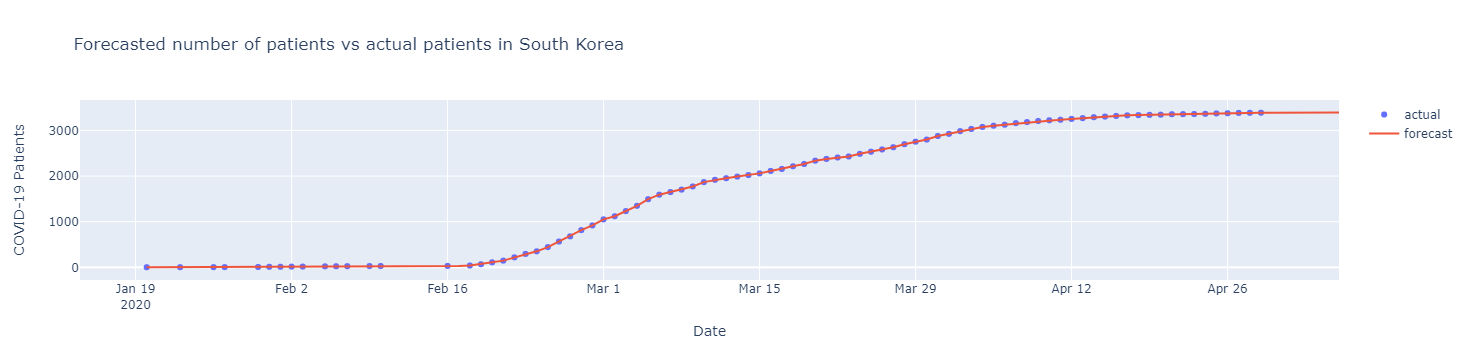

In [378]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=date_list, y=confirmed_case_cumsum, mode='markers', name='actual'))
fig3.add_trace(go.Scatter(x=forecasted_df.index.tolist(), y=forecasted_df.values.tolist(), mode='lines', name='forecast'))
fig3.update_layout(xaxis_title='Date', yaxis_title='COVID-19 Patients', title="Forecasted number of patients vs actual patients in South Korea")
fig3.show()

In [379]:
exp_smoothing_forecast = fit1.forecast(forecast_days)
exp_smoothing_forecast

2020-04-30    3389.223556
2020-05-01    3390.174309
2020-05-02    3391.039495
2020-05-03    3391.826814
2020-05-04    3392.543274
2020-05-05    3393.195252
2020-05-06    3393.788553
Freq: D, dtype: float64

In [391]:
new_patient_df_date_group = patient.groupby('confirmed_date')

In [392]:
cumsum_series = new_patient_df_date_group['confirmed_date'].count().cumsum()

In [393]:
updated_confirmed_case_cumsum = list(cumsum_series)

In [394]:
new_date_list = list(patient['confirmed_date'].dropna().unique())

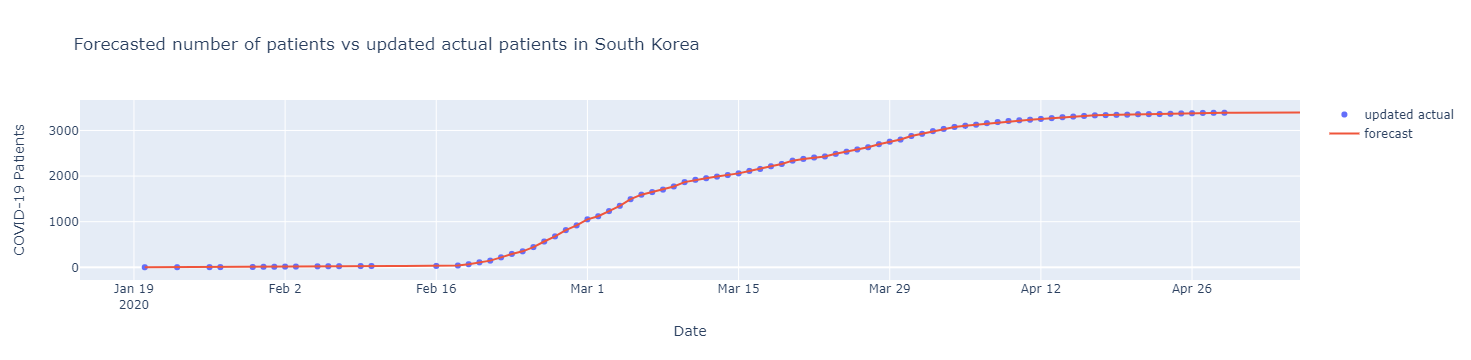

In [395]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=new_date_list, y=updated_confirmed_case_cumsum, mode='markers', name='updated actual'))
fig4.add_trace(go.Scatter(x=forecasted_df.index.tolist(), y=forecasted_df.values.tolist(), mode='lines', name='forecast'))
fig4.update_layout(xaxis_title='Date', yaxis_title='COVID-19 Patients', title="Forecasted number of patients vs updated actual patients in South Korea")
fig4.show()

In [396]:
display(exp_smoothing_forecast) 
# Actual updated count
display(new_patient_df_date_group['confirmed_date'].count().cumsum()[-forecast_days:])

2020-04-30    3389.223556
2020-05-01    3390.174309
2020-05-02    3391.039495
2020-05-03    3391.826814
2020-05-04    3392.543274
2020-05-05    3393.195252
2020-05-06    3393.788553
Freq: D, dtype: float64

confirmed_date
2020-04-23    3360
2020-04-24    3365
2020-04-25    3373
2020-04-26    3377
2020-04-27    3384
2020-04-28    3387
2020-04-29    3388
Name: confirmed_date, dtype: int64

In [397]:
from sklearn.metrics import mean_squared_error

y_true = np.array(updated_confirmed_case_cumsum[-forecast_days:])
y_pred = np.array(forecasted_df.values[-forecast_days:])

forecast_rmse = mean_squared_error(y_true, y_pred, squared=False)
md("#### My forecasted results have a mean deviation of approx. {} counts".format(round(forecast_rmse)))

#### My forecasted results have a mean deviation of approx. 18 counts

In [398]:
def mean_absolute_percentage_error(y_true, y_pred):
    if len(y_true) > 1 and len(y_pred) > 1 and len(y_true) == len(y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    else:
        print("check if y_true and y_pred are same length arrays ")

In [399]:
forecast_mape = mean_absolute_percentage_error(y_true, y_pred)
md("#### My forecasted results have a MAPE of {} %".format(round(forecast_mape, 2)))

#### My forecasted results have a MAPE of 0.46 %

In [ ]:
보간 
두 점사이에 직선의 방정식을 도출해서 만들어진 각각의 다항식을 연속하게끔 연결
두점을 부드~럽게 잇자

1차 y = ax + d  when y = x 일때 원점을 지나는 우상향 직선
2차 y = ax^2 + bx + d 점3개 굴곡 1개
3차 y = ax^3 + bx^2 + cd + d 점4개 굴곡이 2개
.
.
.
n차 오차가 작아지는 직선같은 굴곡
기하행렬 기저행렬